# core

In [1]:
"""
core.py
環境とエージェントの抽象クラス
"""
import numpy as np


class coreEnv:
    """ 環境の抽象クラス """
    def __init__(self):
        """ 初期処理 """
        # 引数の設定は適時編集
        self.n_act = 2  # <--- 行動数を設定
        self.done = False
        # ------------------------- 編集ここから
        # ------------------------- ここまで

    def reset(self):
        """ 状態を初期化 """
        self.done = False
        # ------------------------- 編集ここから
        obs = np.array([0, 0, 0, 0])  # ndarray
        # ------------------------- ここまで
        return obs

    def step(self, act):
        """ 状態を更新 """
        # 最終状態の次の状態はリセット
        if self.done is True:
            obs = self.reset()
            return None, None, obs
        # ------------------------- 編集ここから
        rwd = 1.0                   # float
        done = True                 # bool
        # ------------------------- ここまで
        self.done = done
        # ------------------------- 編集ここから
        # self.done を使った処理
        obs = np.array([0, 0, 0, 0])  # ndarray
        # ------------------------- ここまで
        return rwd, done, obs

    def render(self):
        """ 状態に対応した画像を作成 """
        # ------------------------- 編集ここから
        # img: 3d ndarray
        img = np.zeros((100, 200, 3), dtype=np.uint8)
        # ------------------------- ここまで
        return img


class coreAgt:
    """ エージェントの抽象クラス """
    def __init__(self):
        """ 初期処理 """
        # 引数の設定は適時編集
        self.epsilon = 0.4
        # ------------------------- 編集ここから
        # ------------------------- ここまで

    def select_action(self, obs):
        """ 観測に対して行動を出力 """
        # ------------------------- 編集ここから
        act = 0  # int
        # ------------------------- ここまで
        return act

    def learn(self, obs, act, rwd, done, next_obs):
        """ 学習 """
        if rwd is None:
            return
        # ------------------------- 編集ここから
        # ------------------------- ここまで

    def get_Q(self, obs):
        """ 観測に対するQ値を出力 """
        # ------------------------- 編集ここから
        Q = np.ndarray([0, 0])  # ndarray
        # ------------------------- ここまで
        return Q

    def save_weights(self, filepath):
        """ 方策のパラメータの保存 """
        # ------------------------- 編集ここから
        # ------------------------- ここまで

    def load_weights(self, filepath):
        """ 方策のパラメータの読み込み """
        # ------------------------- 編集ここから
        # ------------------------- ここまで


### env_myenv

In [2]:
# # import cv2
# import numpy as np
# # import core
# import mujoco
# # from tqdm import trange

# xml_path = './xml_models/micromouse.xml'
# times = []
# left_motor_kakusokudo = []
# right_motor_kakusokudo = []
# sensor_LF = []
# sensor_LS = []
# sensor_RF = []
# sensor_RS = []



# class MyEnv(coreEnv):

#     def __init__(self): #引数で受け取るとかは特にないからこんな感じ　各インスタンス変数に値を入れていく
#         self.n_act = 5
#         self.done = False #最初だからFalse
#         self.state = None #状態表示用変数
#         self.m = mujoco.MjModel.from_xml_path(xml_path)#modelを読み込んで用意
#         self.d = mujoco.MjData(self.m) #モデルのデータを用意

#     def reset(self):
#         """ 状態を初期化 """
#         self.done = False
#         # ------------------------- 編集ここから
#         self.state = 'start'
#         mujoco.mj_resetData(self.m, self.d)
#         obs = np.array([0, 0, 0, 0])  # ndarray
#         # ------------------------- ここまで
#         return obs
    
#     def step(self, act):
#         """ 状態を更新 """
#         # 最終状態の次の状態はリセット
#         if self.done is True:
#             obs = self.reset()
#             return None, None, obs
#         # ------------------------- 編集ここから
#         self.d.ctrl = act
#         mujoco.mj_step(self.m, self.d)
#         mujoco.mj_kinematics(self.m, self.d)
#         goal_pos = self.d.geom('goal').xpos
#         mm_pos = self.d.geom('mein_body').xpos
#         self.goal_range = np.sqrt((goal_pos[0] - mm_pos[0])**2+(goal_pos[1] - mm_pos[1])**2)

#         rwd = -self.goal_range      # float  goalとの距離がそのまま罰になる
#         done = False                 # bool

#         if self.goal_range < 0.06: #ゴールに十分近かったら報酬を与えて，終了判定
#             rwd = 300
#             done = True

#         # ------------------------- ここまで
#         self.done = done
#         # ------------------------- 編集ここから
#         # self.done を使った処理
#         ob1 = self.d.sensordata[0].copy() #sensor_LF
#         ob2 = self.d.sensordata[1].copy() #sensor_LS
#         ob3 = self.d.sensordata[2].copy() #sensor_RF
#         ob4 = self.d.sensordata[3].copy() #sensor_RS
#         obs = np.array([ob1, ob2, ob3, ob4])  # ndarray
#         # ------------------------- ここまで
#         return rwd, done, obs
    
#     def render(self):
#         """ 状態に対応した画像を作成 """
#         # ------------------------- 編集ここから
#         # img: 3d ndarray
#         self.viewer.sync() # mj_stepで進めたシミュレーションを，描画に反映する　　物理状態の変更を反映する
#         # ------------------------- ここまで
#         return

# agt_TableQ

In [3]:
"""
agt_tableQ.py
Qテーブルを使ったQ学習アルゴリズム
"""
import sys
import pickle
import numpy as np

# 自作モジュール
# import core


class TableQAgt(coreAgt):
    """ Qテーブルを使ったQ学習エージェントクラス """
    def __init__(           # 引数とデフォルト値の設定 (A)
            self,
            n_act=4,            # int: 行動の種類数
            init_val_Q=0,       # float: Q値の初期値
            epsilon=0.1,        # float: 乱雑度
            alpha=0.1,          # float: 学習率
            gamma=0.9,          # float: 割引率
            max_memory=10000,     # int: 記憶する最大の観測数
            filepath=None,      # str: 保存用ファイル名
            ):
        """ 初期処理 """
        # 引数の設定は適時編集
        self.epsilon = epsilon
        # ------------------------- 編集ここから
        self.n_act = n_act
        # エージェントのハイパーパラメータ (B)
        self.init_val_Q = init_val_Q
        self.gamma = gamma
        self.alpha = alpha

        # 保存ファイル名 (C)
        self.filepath = filepath

        # Qテーブル関連 (D)
        self.Q = {}     # Qテーブルの辞書を用意
        self.len_Q = 0  # Qテーブルに登録した観測の数記録変数　最初だから０
        self.max_memory = max_memory #記録する最大の観測数
        # ------------------------- ここまで

    def select_action(self, obs):
        """ 観測に対して行動を出力 """
        # ------------------------- 編集ここから
        # obsを文字列に変換 (A)　辞書でやってるから，ndarray型を変える必要があるので文字列に変換しといてる
        obs = str(obs)

        # obs が登録されていなかったら初期値を与えて登録 (B) #登録されていたら何もしない
        self._check_and_add_observation(obs)

        # 確率的に処理を分岐 (C)
        if np.random.rand() < self.epsilon:
            # epsilon の確率(D)
            act_select = np.random.randint(0, self.n_act)  # ランダム行動選択
        else:
            # 1-epsilon の確率(E)
            max_Q_action = np.where(self.Q[obs] == np.max(self.Q[obs]))[0]
            random_choice_max_Q_action = np.random.choice(max_Q_action)
            act_select = random_choice_max_Q_action

        # ------------------------- ここまで
        return act_select

    def _check_and_add_observation(self, obs):
        """ obs が登録されていなかったら初期値を与えて登録 """
        if obs not in self.Q:  # (A) セルフQにその辞書のキーがなかったら，
            self.Q[obs] = [self.init_val_Q] * self.n_act  # (B)　obsをキーとして，Qの初期値をact個用意して追加
            self.len_Q += 1  # (C)　追加したので，Qの大きさの変数を１増やす
            if self.len_Q > self.max_memory:  # (D)　Qの大きさがマックスを超えたら
                print(f'観測の登録数が上限 ' +
                      f'{self.max_memory:d} に達しました。')
                sys.exit() #プログラムは即座に終了
            if (self.len_Q < 100 and self.len_Q % 10 == 0) or \
                    (self.len_Q % 100 == 0):  # (E) 100以下で１０で割り切れる場合　または　１００で割り切れる場合
                print(f'the number of obs in Q-table' +
                      f' --- {self.len_Q:d}') #表示する

    def learn(self, obs, act, rwd, done, next_obs):
        """ 学習 """
        if rwd is None:  # rwdがNoneだったら戻る(A)
            return
        # ------------------------- 編集ここから
        # obs, next_obs を文字列に変換 (B)　今とその次のobsを使って学習を行うために必要
        obs = str(obs)
        next_obs = str(next_obs)

        # next_obs が登録されていなかったら初期値を与えて登録 (C)
        self._check_and_add_observation(next_obs)

        # 学習のターゲットを作成 (D)
        if done is True: #動的計画法の一番後ろだったら期待値は報酬そのものであるため
            target = rwd
        else: #動的計画法的に，まだエピソードが終わらない場合の期待値はその報酬とその次の状態の最大のＱ値をとる行動のＱ値であるため
            target = rwd + self.gamma * max(self.Q[next_obs])

        # Qをターゲットに近づける (E)
        self.Q[obs][act] = (1 - self.alpha) * self.Q[obs][act] + self.alpha * target #平均の更新足　ここではQ値の更新則  すべての経験の平均の期待値がここに追加されるので，ちゃんと行動価値（その行動によって得た値の平均つまり期待値）の値になっている
        # ------------------------- ここまで

    def get_Q(self, obs):
        """ 観測に対するQ値を出力 """
        # ------------------------- 編集ここから
        obs = str(obs) #受け取ったobsを文字列に変換して，
        if obs in self.Q:   # obsがQにある (A)場合はその値を取り出す（その状態での各行動のQ値がそれぞれ出る）
            val = self.Q[obs]
            Q = np.array(val) #nparray型に変換してから返す
        else:               # obsがQにない (B)
            Q = None #なければないで終わり
        # ------------------------- ここまで
        return Q

    def save_weights(self, filepath=None):
        """ 方策のパラメータの保存 """
        # ------------------------- 編集ここから
        # Qテーブルの保存
        if filepath is None:
            filepath = self.filepath + '.pkl'
        with open(filepath, mode='wb') as f:
            pickle.dump(self.Q, f) #Q値を保存する　
        # ------------------------- ここまで

    def load_weights(self, filepath=None):
        """ 方策のパラメータの読み込み """
        # ------------------------- 編集ここから
        # Qテーブルの読み込み
        if filepath is None:
            filepath = self.filepath + '.pkl'
        with open(filepath, mode='rb') as f:
            self.Q = pickle.load(f) #ここでQ値を復元してる
        # ------------------------- ここまで


# MyEnv

In [4]:
"""
sibuyaatusiタスク
"""

import numpy as np  # ベクトル・行列演算ライブラリ (A)
import mujoco
from tqdm import trange
import time
# import mujoco_viewer

NUM_DIZITIZED = 6
MAX_STEP = 500000

#センサ値
sens_F = 0.2
sens_S = 0.2


class MyEnv(coreEnv):
    """ コリドータスクの環境クラス """
    

    def __init__(                   # (B)
            self,
            ):
        """ 初期処理 """
        
        # 引数の設定は適時編集
        self.n_act = 9  # <--- 行動数を設定 (C)個数なので1から数える
        self.done = False
        # ------------------------- 編集ここから
        """ インスタンス生成時の処理 """
        # タスクパラメータ (D)
        # self.model = mujoco.MjModel.from_xml_path('.\micromouse_straight_new.xml')#modelを読み込んで用意 インスタンスに用意しておく
        self.model = mujoco.MjModel.from_xml_path('.\mouse_in_maze_for_3_light.xml')#modelを読み込んで用意 インスタンスに用意しておく
        self.data = mujoco.MjData(self.model) #モデルのデータを用意
        self.viewer = mujoco.viewer.launch_passive(self.model,self.data) #mujoco描画起動
        # self.viewer = mujoco_viewer.MujocoViewer(self.model, self.data)
        self.init_pos = self.data.qpos #ロボットの初期位置座標取得
        self.init_vel = self.data.qvel #ロボットの初期速度取得
        self.stepcount = 0
        self.wheel_left_id = mujoco.mj_name2id(self.model, 3,'left wheel joint')
        self.wheel_right_id = mujoco.mj_name2id(self.model, 3,'right wheel joint')
        self.wheel_ang_left = self.data.qpos[7]
        self.wheel_ang_right = self.data.qpos[8]
        print("ID!:",self.wheel_left_id)

        # ------------------------- ここまで

    def reset(self):
        """ 状態を初期化 """
        self.done = False  # (A)
        # ------------------------- 編集ここから
        # ロボットの位置を開始位置へ戻す (C)####################################################################################################env.model.geom_pos
        # self.data.qpos = self.init_pos
        # self.data.qvel = self.init_vel #的な感じにして，初期の位置を与えることで初期位置に戻せるようにする　初期値を記述する　pauseしてからprint dataで取れそう？
        self.stepcount = 0
        mujoco.mj_resetData(self.model, self.data)

        # 初期の観測値を用意 (E)
        obs = self._make_obs()
        # ------------------------- ここまで
        return obs
    
    # def discretize(value):
    # # 0から0.18の範囲を10段階に分割
    #     if value == -1:
    #         value = 0.18
    #     discrete_value = int(value / 0.018)
    #     return min(discrete_value, 9)  # 最大値が10段階目になるように調整 9以上にならないようにしている

    # def discretize_values(self, ob1, ob2, ob3, ob4):
    #     # 各値を離散化
    #     discrete_ob1 = self.discretize(ob1)
    #     discrete_ob2 = self.discretize(ob2)
    #     discrete_ob3 = self.discretize(ob3)
    #     discrete_ob4 = self.discretize(ob4)
    #     sum = discrete_ob1*1000 + discrete_ob2*100 + discrete_ob3*10 + discrete_ob4*1

    #     return sum

    # 離散化
    def bins(self, clip_min, clip_max, num):
        return np.linspace(clip_min, clip_max, num + 1)[1:-1]

    def _make_obs(self): #クラスの内部でしか使わない，内部用メソッドであるため_をつけている
        """ 状態から観測を作成(状態（観測）の離散化を行って観測とする) """
        # 最終状態判定がTrueだったら 9999 を出力 (A)
        if self.done is True:
            obs = np.array([9] * 4)
            return obs #どうせこの後はリセットするし，あまり意味はないかも
        
        # 4つのセンサの値を受け取り，それを離散化して0~9で表したのち，4桁の整数１つとして観測を表す
        ob1 = self.data.sensordata[0].copy() #sensor_LF
        ob2 = self.data.sensordata[1].copy() #sensor_LS
        ob3 = self.data.sensordata[2].copy() #sensor_RS
        ob4 = self.data.sensordata[3].copy() #sensor_RF
        if ob1 == -1:
            ob1 = sens_F
        if ob2 == -1:
            ob2 = sens_S
        if ob3 == -1:
            ob3 = sens_S
        if ob4 == -1:
            ob4 = sens_F
        # quat = self.data.xquat[1]
        # rounded_quat = round(quat, 2)
        # self.rounded_quat_array = np.array(rounded_quat)

        # goal_quat = [0, 0.7, 0, 0]
        # self.goal_quat_array = np.array(goal_quat)

        # obs = self.rounded_quat_array - self.goal_quat_array


        obs=np.digitize(ob1, bins=self.bins(0.0, sens_F, NUM_DIZITIZED))*1000 + \
            np.digitize(ob2, bins=self.bins(0.0, sens_S, NUM_DIZITIZED))*100 + \
            np.digitize(ob3, bins=self.bins(0.0, sens_S, NUM_DIZITIZED))*10 + \
            np.digitize(ob4, bins=self.bins(0.0, sens_F, NUM_DIZITIZED))*1
        
        # print(obs)
        return obs

    def step(self, act_select):
        whatdone = False
        """ 状態を更新 """
        # 最終状態の次の状態はリセット(A)
        if self.done is True:
            obs = self.reset()
            return 0, None, obs
        
        # step数が基準を超えたら
        if self.stepcount == MAX_STEP:
            obs = self.reset()
            rwd = 1
            return rwd, None, obs
        
        
        if act_select == 0:
            act = [0.1, 0.1]
            
        # elif act_select == 1:
        #     act = [0.0, 0.16]
            
        # elif act_select == 2:
        #     act = [0.16, 0.0]
            
        # elif act_select == 3:
        #     act = [0.0, 0.0]
            
        # elif act_select == 4:
        #     act = [-0.16, -0.0]
        
        # elif act_select == 5:
        #     act = [-0.0, -0.16]
            
        elif act_select == 1:
            act = [-0.1, -0.1]
            
        elif act_select == 2:
            act = [-0.16, 0.16]
            
        elif act_select == 3:
            act = [0.16, -0.16]
        # elif act_select == 4:
        #     act = [0, 0] #行動選択を具体的なモータ出力に変換している(モータを動かす組み合わせを選ぶ)
        else:
            print("ありえない行動選択をしているこれはバグに違いない")

        # print("選んだ行動",act_select)
        
        self.data.ctrl = act.copy() #行動選択のactをctrlにコピーすることで，モータを回す
        # before_goal_range = np.sqrt((before_goal_pos[0] - before_mm_pos[0])**2+(before_goal_pos[1] - before_mm_pos[1])**2) #三平方の定理
        self.prev_wheel_ang_left = self.data.qpos[7]
        self.prev_wheel_ang_right = self.data.qpos[8]
        for mjst in range(250):
            mujoco.mj_step(self.model, self.data) #3000step進める####決めた行動を行った後3000mjstep後の，環境の様子を強化学習の1stepと判断したいため#######################################################################################################
            self.hit_wall_f = self.data.sensordata[4].copy() #フォースセンサの値取得
            self.hit_wall_b = self.data.sensordata[5].copy() #フォースセンサの値取得
            if self.hit_wall_f > 0 or self.hit_wall_b > 0:
                rwd = (self.stepcount/MAX_STEP) - 10
                whatdone = True
                self.done = whatdone  # (E) #確定したdone情報を，インスタンス変数のdoneに保存
                obs = self._make_obs()  # 行動後のobsを作成(F) ここではセンサ値を取得する　next_obsに対応している値で，行動後の観測値である．ぶつかったときのobs
                self.viewer.sync() #mujoco描画起動
                # self.viewer.render()
                return rwd, whatdone, obs #ぶつかったらアウト
            
            # self.viewer.render()
            self.viewer.sync() #mujoco描画起動viewer
                 # mj_stepで進めたシミュレーションを，描画に反映する　　物理状態の変更を反映する
        self.wheel_ang_left = self.data.qpos[7]
        self.wheel_ang_right = self.data.qpos[8]
        self.stepcount += 1 #step数を測るためのインスタンス変数
        # mujoco.mj_kinematics(self.model, self.data) #ネームアクセスするために必要
        # goal_pos = self.data.geom('goal').xpos #ゴールの位置座標取得
        robot_pos = self.data.geom('mein_body1').xpos #ロボットの位置座標取得
        self.hit_wall_f = self.data.sensordata[4].copy() #フォースセンサの値取得
        self.hit_wall_b = self.data.sensordata[5].copy() #フォースセンサの値取得
        
        
        # if hit_wall_b != 0:
        #     print(hit_wall_b)
        # if hit_wall_f != 0:
        #     print(hit_wall_f)

        # goal_range = np.sqrt((goal_pos - robot_pos)**2)
        # goal_range = np.sqrt((goal_pos[0] - robot_pos[0])**2+(goal_pos[1] - robot_pos[1])**2) #三平方の定理
        # if goal_range < 0.16: #ゴールしたら
        #     rwd = 2
        #     print("goal!!")
        #     whatdone = True
        
        # elif
        if whatdone != True:
            leftwheel_ang = self.wheel_ang_left - self.prev_wheel_ang_left
            rightwheel_ang = self.wheel_ang_right - self.prev_wheel_ang_right #前ー後 つまり進んでたら正になるし下がってたら負になる
            if leftwheel_ang <= 0:
                leftwheel_ang = leftwheel_ang*3
            if rightwheel_ang <= 0:
                rightwheel_ang = rightwheel_ang*3
            rwd = (leftwheel_ang + rightwheel_ang)/8 # rwd = (1/(goal_range + 0.2))*0.005 #- np.sqrt(np.sum((self.rounded_quat_array - self.goal_quat_array)**2)) #とにかくずれがバツとなる
            # print(rwd)
            # ob1 = self.data.sensordata[0].copy() #sensor_LF
            # LS = self.data.sensordata[1].copy() #sensor_LS
            # # ob3 = self.data.sensordata[2].copy() #sensor_RF
            # RS = self.data.sensordata[3].copy() #sensor_RS
            # # if np.isnan(LS):
            # #     LS = 0.15
            # # if np.isnan(RS):
            # #     RS = 0.15
            # LS = np.floor(LS * 1000) / 1000
            # RS = np.floor(RS * 1000) / 1000
            # rwd = 0.1 - abs(LS-RS)*3
            # print(rwd)
            # rew_ob1 = self.data.sensordata[0].copy() #sensor_LF
            # rew_ob2 = self.data.sensordata[1].copy() #sensor_LS
            # rew_ob3 = self.data.sensordata[2].copy() #sensor_RS
            # rew_ob4 = self.data.sensordata[3].copy() #sensor_RF

            # sensor_reward1=np.digitize(rew_ob1, bins=self.bins(0.0, sens_F, NUM_DIZITIZED+6))-2 #0,1,2,3,4の5段階なので，近かったら報酬，離れていたら罰とする
            # sensor_reward2=np.digitize(rew_ob2, bins=self.bins(0.0, sens_S, NUM_DIZITIZED+6))-2  #ここは0,1,2,3の4段階なので
            # sensor_reward3=np.digitize(rew_ob3, bins=self.bins(0.0, sens_S, NUM_DIZITIZED+6))-2
            # sensor_reward4=np.digitize(rew_ob4, bins=self.bins(0.0, sens_F, NUM_DIZITIZED+6))-2
            # rwd -= (1/(rew_ob1 + rew_ob2 + rew_ob3 + rew_ob4))

            # 状態から，壁パターンリストに変換
            # rew_sensor_value=np.digitize(rew_ob1, bins=self.bins(0.0, sens_F, NUM_DIZITIZED))*1000 + \
            # np.digitize(rew_ob2, bins=self.bins(0.0, sens_S, NUM_DIZITIZED))*100 + \
            # np.digitize(rew_ob3, bins=self.bins(0.0, sens_S, NUM_DIZITIZED))*10 + \
            # np.digitize(rew_ob4, bins=self.bins(0.0, sens_F, NUM_DIZITIZED))*1
            # rew_sensor_value=str(rew_sensor_value)
            # if "2" not in rew_sensor_value:
            #     decimal_output = int(rew_sensor_value, 2)
            #     wall_pattern_list = [7,8,6,8,3,8,2,8,8,5,8,4,8,1,8,0]
            #     wall_pattern = wall_pattern_list[decimal_output]
            #     # rwd_wall = [[ 2, 2, 2,-1,-1,-1,-1, 0, 0],\
            #     #             [ 2,-1, 2,-1,-1,-1,-1, 0, 0],\
            #     #             [-1, 2, 2,-1,-1,-1,-1, 0, 0],\
            #     #             [-1,-1, 2,-1,-1,-1,-1, 0, 0],\
            #     #             [ 2, 2,-1,-1,-1,-1,-1, 0, 0],\
            #     #             [ 2,-1,-1,-1,-1,-1,-1, 0, 0],\
            #     #             [-1, 2,-1,-1,-1,-1,-1, 0, 0],\
            #     #             [-1,-1,-1, 0,-1,-1,-1, 0.2, 0],\
            #     #             [0, 0, 0, 0, 0, 0, 0, 0, 0]]
            #     rwd_wall = [[ 2, 2, 2,-1,-1,-1,-1, 0.1, 0.1],\
            #                 [ 2,-1, 2,-1,-1,-1,-1, -1, 2],\
            #                 [-1, 2, 2,-1,-1,-1,-1, 2, 2],\
            #                 [-1,-1, 2,-1,-1,-1,-1, -1, 2],\
            #                 [ 2, 2,-1,-1,-1,-1,-1, 2, -1],\
            #                 [ 2,-1,-1,-1,-1,-1,-1, 0, 0],\
            #                 [-1, 2,-1,-1,-1,-1,-1, 2, 0],\
            #                 [-1,-1,-1, 0,-1,-1,-1, 0.5, 0],\
            #                 [0, 0, 0, 0, 0, 0, 0, 0, 0]]
            #     rwd+=rwd_wall[wall_pattern][act_select]


                # print("abs:",rwd)
            whatdone = False

        # ------------------------- ここまで
        self.done = whatdone  # (E) #確定したdone情報を，インスタンス変数のdoneに保存
        # ------------------------- 編集ここから
        obs = self._make_obs()  # 行動後のobsを作成(F) ここではセンサ値を取得する　next_obsに対応している値で，行動後の観測値である．
        # ------------------------- ここまで
        return rwd, whatdone, obs

    def render(self):
        """ 状態に対応した画像を作成 """ #工事中################＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
        mujoco.viewer.launch_passive(self.model, self.data).sync() # mj_stepで進めたシミュレーションを，描画に反映する　　物理状態の変更を反映する



In [5]:

# if __name__ == '__main__':
#     # 操作方法の表示 (A)
#     msg = (
#         '\n' +
#         '---- 操作方法 -------------------------------------\n'
#         '[f] 右に進む\n' +
#         '[d] 拾う\n' +
#         '[q] 終了\n' +
#         'クリスタルを拾うと成功\n' +
#         '---------------------------------------------------'
#     )
#     print(msg)

#     # 環境の準備 (B)
#     env = MyEnv()

#     # 環境のパラメータの与え方例
#     """
#     env = CorridorEnv(
#         field_length=6,
#         crystal_candidate=(2, 3, 4, 5),
#         rwd_fail=-1,
#         rwd_move=0,
#         rwd_crystal=10,
#     )
#     """

#     # 強化学習情報の初期化 (C)
#     t = 0
#     obs = env.reset()
#     act = None
#     rwd = None
#     done = None

#     # 開始の表示 (D)
#     print('')
#     print('あなたのプレイ開始')

#     # 強化学習情報表示の関数定義 (E)
#     def show_info(t, act, rwd, done, obs, isFirst=False):
#         """ 強化学習情報の表示 """
#         if rwd is None:  # (F)
#             if isFirst:
#                 tt = t
#             else:
#                 tt = t + 1
#             print('')
#             print(f'x({tt:d})={str(obs):s}')
#         else:  # (G)
#             msg = (
#                 f'a({t:d})={act:d}, ' +
#                 f'r({t:d})={rwd: .2f}, ' +
#                 f'done({t:d})={done:}, ' +
#                 f'x({t + 1:d})={str(obs):s}'
#             )
#             print(msg)

#     # 強化学習情報表示 (H)
#     show_info(t, act, rwd, done, obs, isFirst=True)

#     # シミュレーション (I)
#     while True:
#         # 画面表示 (J)
#         image = env.render()
#         cv2.imshow('you', image)

#         # キーの受付と終了処理 (K)
#         key = cv2.waitKey(0)
#         if key == ord('q'):
#             break

#         # あなたの行動選択 (L)
#         if key in [ord('d'), ord(' ')]:
#             act = 0  # 拾う
#         elif key == ord('f'):
#             act = 1  # 進む
#         else:
#             continue

#         # 環境の更新 (M)
#         rwd, done, obs = env.step(act)

#         # 強化学習情報表示 (N)
#         show_info(t, act, rwd, done, obs)
#         t += 1
# 回転の運動方程式から考えて，力学が何が起きているか考える　摩擦適当じゃんそれはまずい．ご法度　

# 実行部分（main?）

In [6]:
from tqdm import trange
import numpy as np
import mujoco
import mujoco.viewer
import time
import matplotlib.pyplot as plt
# MAX_STEP = 50000
NUM_EPISODE = 250000
QTABLE_SAVE_MODE = True
INCREMENTAL_LEARNING_MODE = True
epi_reward_graph = []
# timestep_count = []
sumreward = 0
stepsum = []


env = MyEnv()
agt = TableQAgt()

if INCREMENTAL_LEARNING_MODE:
        # 保存されたQテーブルを読み込む
        with open('kabe_keiryouban_3000epi.pkl', 'rb') as f:
            loaded_data = pickle.load(f)

        # 読み込んだデータから必要な変数やリストを取り出す
        agt.Q = loaded_data['agt.Q']
        type(agt.Q)
        agt.len_Q = loaded_data['agt.len_Q']
        epi_reward_graph = loaded_data['epi_reward_graph']
        stepsum = loaded_data['stepsum']
        
        print("agt.len_Q(Qテーブルの数は)",type(agt.len_Q))
        print(agt.len_Q)

        print("Qtableを読み込みました．追加学習します")

# with mujoco.viewer.launch_passive(env.model,env.data) as viewer: #mujoco描画起動

obs = env.reset() #エピソード初期の観測を取得
for episode_num in trange(NUM_EPISODE):
    for step_num in range (MAX_STEP):
        # time.sleep(1)  # 1秒間停止
        act = agt.select_action(obs) #obsにより，行動を決める　Qテーブルのそのマス目を用意して，たまにイプシロングリーディでランダム動作が起きる
        # print("Qtableは：",str(obs),agt.Q[str(obs)])
        # print(env.wheel_ang_left)
        rwd, done, next_obs = env.step(act)
        # env.viewer.render()
        agt.learn(obs, act, rwd, done, next_obs)
        # time.sleep(2)
        # print(agt.Q)
        # print(obs)####################
        obs = next_obs
        sumreward += rwd
        if done == True:
            stepsum.append(env.stepcount)
            obs = env.reset() #エピソード初期の観測を取得
            break
    epi_reward_graph.append(sumreward)
    sumreward = 0

    # print(episode_num % 10)
    
    
    if episode_num % 2 == 1: #2エピソードごとにQテーブル保存
        if QTABLE_SAVE_MODE:
            # Qテーブルを保存する
            # 保存したい変数やリストを辞書にまとめる
            data_to_save = { #辞書でまとめてます
                'agt.Q': agt.Q,
                'agt.len_Q': agt.len_Q,
                'epi_reward_graph': epi_reward_graph,
                'stepsum': stepsum,
                'episode_num': episode_num,
                # 一応
                # 'before_timestep_count': timestep_count,
            }
            with open('kabe_keiryouban_3000epi.pkl', 'wb') as f:
                pickle.dump(data_to_save, f)
            print("Qtable保存しました")

def generate_numbered_array(length):
    return list(range(1, length+1))

# 例: 長さ指定の配列を生成
timestep_count = generate_numbered_array((episode_num+1))
plt.xlabel("episode数", fontname="MS Gothic")
plt.ylabel("reward", fontname="MS Gothic")
plt.grid()
plt.title("エピソードごとの報酬", fontname="MS Gothic")
plt.plot(timestep_count, epi_reward_graph, linestyle='solid', label="reward")
plt.legend(prop={'family':'MS Gothic'})
plt.show()
plt.xlabel("episode数", fontname="MS Gothic")
plt.ylabel("step数", fontname="MS Gothic")
plt.grid()
plt.title("エピソードごとの報酬", fontname="MS Gothic")
plt.plot(timestep_count, stepsum, linestyle='solid', label="reward")
plt.legend(prop={'family':'MS Gothic'})
plt.show()

ID!: 1
agt.len_Q(Qテーブルの数は) <class 'int'>
665
Qtableを読み込みました．追加学習します


  0%|          | 2/250000 [00:15<545:06:25,  7.85s/it]

Qtable保存しました


  0%|          | 4/250000 [00:37<609:04:13,  8.77s/it]

Qtable保存しました


  0%|          | 6/250000 [01:27<1173:15:04, 16.90s/it]

Qtable保存しました


  0%|          | 8/250000 [02:51<2233:37:52, 32.17s/it]

Qtable保存しました


  0%|          | 10/250000 [04:49<2872:13:00, 41.36s/it]

Qtable保存しました


  0%|          | 12/250000 [05:37<2186:59:00, 31.49s/it]

Qtable保存しました


  0%|          | 14/250000 [06:16<1800:40:06, 25.93s/it]

Qtable保存しました


  0%|          | 16/250000 [07:16<1837:21:52, 26.46s/it]

Qtable保存しました


  0%|          | 18/250000 [08:16<1965:37:15, 28.31s/it]

Qtable保存しました


  0%|          | 20/250000 [09:07<1843:21:59, 26.55s/it]

Qtable保存しました


  0%|          | 22/250000 [09:24<1176:00:04, 16.94s/it]

Qtable保存しました


  0%|          | 24/250000 [09:42<901:26:08, 12.98s/it] 

Qtable保存しました


  0%|          | 26/250000 [10:02<772:59:38, 11.13s/it]

Qtable保存しました


  0%|          | 28/250000 [10:16<632:27:22,  9.11s/it]

Qtable保存しました


  0%|          | 30/250000 [10:26<491:58:22,  7.09s/it]

Qtable保存しました


  0%|          | 32/250000 [10:53<746:50:48, 10.76s/it]

Qtable保存しました


  0%|          | 34/250000 [11:01<510:09:22,  7.35s/it]

Qtable保存しました


  0%|          | 36/250000 [11:21<609:54:42,  8.78s/it]

Qtable保存しました


  0%|          | 38/250000 [11:40<662:11:17,  9.54s/it]

Qtable保存しました


  0%|          | 40/250000 [12:11<912:21:07, 13.14s/it]

Qtable保存しました


  0%|          | 42/250000 [12:43<1056:29:23, 15.22s/it]

Qtable保存しました


  0%|          | 44/250000 [12:54<711:21:11, 10.25s/it] 

Qtable保存しました


  0%|          | 46/250000 [13:11<693:19:19,  9.99s/it]

Qtable保存しました


  0%|          | 48/250000 [13:48<924:34:50, 13.32s/it] 

Qtable保存しました


  0%|          | 50/250000 [14:07<802:14:31, 11.55s/it]

Qtable保存しました


  0%|          | 52/250000 [14:29<757:22:31, 10.91s/it]

Qtable保存しました


  0%|          | 54/250000 [16:14<2407:44:23, 34.68s/it]

Qtable保存しました


  0%|          | 56/250000 [18:33<3251:01:40, 46.83s/it]

Qtable保存しました


  0%|          | 58/250000 [20:57<3762:38:09, 54.19s/it]

Qtable保存しました


  0%|          | 60/250000 [23:14<4001:03:39, 57.63s/it]

Qtable保存しました


  0%|          | 62/250000 [23:51<2698:50:04, 38.87s/it]

Qtable保存しました


  0%|          | 64/250000 [24:28<2039:17:15, 29.37s/it]

Qtable保存しました


  0%|          | 66/250000 [25:50<2644:49:44, 38.10s/it]

Qtable保存しました


  0%|          | 68/250000 [26:30<2061:57:21, 29.70s/it]

Qtable保存しました


  0%|          | 70/250000 [28:18<2852:40:04, 41.09s/it]

Qtable保存しました


  0%|          | 72/250000 [28:36<1722:12:24, 24.81s/it]

Qtable保存しました


  0%|          | 74/250000 [29:09<1406:10:26, 20.25s/it]

Qtable保存しました


  0%|          | 76/250000 [29:37<1160:47:40, 16.72s/it]

Qtable保存しました


  0%|          | 78/250000 [30:14<1247:10:55, 17.97s/it]

Qtable保存しました


  0%|          | 80/250000 [30:35<936:02:53, 13.48s/it] 

Qtable保存しました


  0%|          | 82/250000 [31:23<1289:24:46, 18.57s/it]

Qtable保存しました


  0%|          | 84/250000 [31:46<1061:44:44, 15.29s/it]

Qtable保存しました


  0%|          | 86/250000 [33:22<2048:58:55, 29.52s/it]

Qtable保存しました


  0%|          | 88/250000 [33:49<1505:58:30, 21.69s/it]

Qtable保存しました


  0%|          | 90/250000 [34:26<1332:59:50, 19.20s/it]

Qtable保存しました


  0%|          | 92/250000 [36:26<2536:23:47, 36.54s/it]

Qtable保存しました


  0%|          | 94/250000 [36:48<1592:50:25, 22.95s/it]

Qtable保存しました


  0%|          | 96/250000 [37:25<1407:12:17, 20.27s/it]

Qtable保存しました


  0%|          | 98/250000 [37:55<1174:00:14, 16.91s/it]

Qtable保存しました


  0%|          | 100/250000 [38:06<773:21:04, 11.14s/it]

Qtable保存しました


  0%|          | 102/250000 [38:17<543:33:59,  7.83s/it]

Qtable保存しました


  0%|          | 104/250000 [39:29<1360:09:41, 19.59s/it]

Qtable保存しました


  0%|          | 106/250000 [40:07<1295:46:38, 18.67s/it]

Qtable保存しました


  0%|          | 108/250000 [40:28<1028:10:22, 14.81s/it]

Qtable保存しました


  0%|          | 110/250000 [40:34<619:11:46,  8.92s/it] 

Qtable保存しました


  0%|          | 112/250000 [42:56<2500:37:58, 36.03s/it]

Qtable保存しました


  0%|          | 114/250000 [44:39<3322:42:09, 47.87s/it]

Qtable保存しました


  0%|          | 116/250000 [45:39<2793:26:10, 40.24s/it]

Qtable保存しました


  0%|          | 118/250000 [46:51<2526:45:29, 36.40s/it]

Qtable保存しました


  0%|          | 120/250000 [47:03<1433:12:52, 20.65s/it]

Qtable保存しました


  0%|          | 122/250000 [47:29<1195:10:07, 17.22s/it]

Qtable保存しました


  0%|          | 124/250000 [47:43<826:21:08, 11.91s/it] 

Qtable保存しました


  0%|          | 126/250000 [48:25<1252:14:47, 18.04s/it]

Qtable保存しました


  0%|          | 128/250000 [48:41<872:47:43, 12.57s/it] 

Qtable保存しました


  0%|          | 130/250000 [48:50<591:33:37,  8.52s/it]

Qtable保存しました


  0%|          | 132/250000 [49:18<730:13:31, 10.52s/it]

Qtable保存しました


  0%|          | 134/250000 [49:45<775:31:42, 11.17s/it]

Qtable保存しました


  0%|          | 136/250000 [51:29<2118:47:12, 30.53s/it]

Qtable保存しました


  0%|          | 138/250000 [52:30<2223:26:19, 32.04s/it]

Qtable保存しました


  0%|          | 140/250000 [53:14<1780:32:52, 25.65s/it]

Qtable保存しました


  0%|          | 142/250000 [54:39<2190:30:55, 31.56s/it]

Qtable保存しました


  0%|          | 144/250000 [54:50<1267:10:45, 18.26s/it]

Qtable保存しました


  0%|          | 146/250000 [55:03<855:38:33, 12.33s/it] 

Qtable保存しました


  0%|          | 148/250000 [55:16<645:26:55,  9.30s/it]

Qtable保存しました


  0%|          | 150/250000 [55:29<547:09:09,  7.88s/it]

Qtable保存しました


  0%|          | 152/250000 [55:40<468:31:32,  6.75s/it]

Qtable保存しました


  0%|          | 154/250000 [55:53<470:22:25,  6.78s/it]

Qtable保存しました


  0%|          | 156/250000 [56:26<824:34:04, 11.88s/it]

Qtable保存しました


  0%|          | 158/250000 [56:43<683:57:01,  9.86s/it]

Qtable保存しました


  0%|          | 160/250000 [57:21<925:12:29, 13.33s/it] 

Qtable保存しました


  0%|          | 162/250000 [58:29<1542:12:39, 22.22s/it]

Qtable保存しました


  0%|          | 164/250000 [1:02:32<4804:50:04, 69.24s/it]

Qtable保存しました


  0%|          | 166/250000 [1:03:29<3236:32:08, 46.64s/it]

Qtable保存しました


  0%|          | 168/250000 [1:03:55<2040:33:18, 29.40s/it]

Qtable保存しました


  0%|          | 170/250000 [1:05:03<2390:12:16, 34.44s/it]

Qtable保存しました


  0%|          | 172/250000 [1:06:00<2073:58:59, 29.89s/it]

Qtable保存しました


  0%|          | 174/250000 [1:06:47<1736:12:59, 25.02s/it]

Qtable保存しました


  0%|          | 176/250000 [1:07:15<1346:12:38, 19.40s/it]

Qtable保存しました


  0%|          | 178/250000 [1:07:46<1210:23:29, 17.44s/it]

Qtable保存しました


  0%|          | 180/250000 [1:08:32<1401:20:30, 20.19s/it]

Qtable保存しました


  0%|          | 182/250000 [1:08:42<847:08:18, 12.21s/it] 

Qtable保存しました


  0%|          | 184/250000 [1:08:49<538:04:44,  7.75s/it]

Qtable保存しました


  0%|          | 186/250000 [1:09:06<595:24:04,  8.58s/it]

Qtable保存しました


  0%|          | 188/250000 [1:09:42<963:43:02, 13.89s/it]

Qtable保存しました


  0%|          | 190/250000 [1:11:11<1954:44:28, 28.17s/it]

Qtable保存しました


  0%|          | 192/250000 [1:11:29<1243:16:00, 17.92s/it]

Qtable保存しました


  0%|          | 194/250000 [1:12:17<1389:06:28, 20.02s/it]

Qtable保存しました


  0%|          | 196/250000 [1:12:29<921:55:17, 13.29s/it] 

Qtable保存しました


  0%|          | 198/250000 [1:12:53<884:07:33, 12.74s/it]

Qtable保存しました


  0%|          | 200/250000 [1:13:34<1236:42:04, 17.82s/it]

Qtable保存しました


  0%|          | 202/250000 [1:14:28<1450:52:51, 20.91s/it]

Qtable保存しました


  0%|          | 204/250000 [1:15:24<1761:32:02, 25.39s/it]

Qtable保存しました


  0%|          | 206/250000 [1:15:35<1077:59:23, 15.54s/it]

Qtable保存しました


  0%|          | 208/250000 [1:16:10<1071:05:26, 15.44s/it]

Qtable保存しました


  0%|          | 210/250000 [1:16:30<875:15:10, 12.61s/it] 

Qtable保存しました


  0%|          | 212/250000 [1:17:06<1085:14:49, 15.64s/it]

Qtable保存しました


  0%|          | 214/250000 [1:17:26<931:36:02, 13.43s/it] 

Qtable保存しました


  0%|          | 216/250000 [1:17:32<556:49:40,  8.03s/it]

Qtable保存しました


  0%|          | 218/250000 [1:19:29<2272:33:09, 32.75s/it]

Qtable保存しました


  0%|          | 220/250000 [1:20:10<1775:22:25, 25.59s/it]

Qtable保存しました


  0%|          | 222/250000 [1:20:41<1488:57:41, 21.46s/it]

Qtable保存しました


  0%|          | 224/250000 [1:21:06<1222:02:26, 17.61s/it]

Qtable保存しました


  0%|          | 226/250000 [1:21:19<874:06:57, 12.60s/it] 

Qtable保存しました


  0%|          | 228/250000 [1:21:27<553:48:52,  7.98s/it]

Qtable保存しました


  0%|          | 230/250000 [1:21:58<764:23:12, 11.02s/it]

Qtable保存しました


  0%|          | 232/250000 [1:22:21<778:43:07, 11.22s/it]

Qtable保存しました


  0%|          | 234/250000 [1:22:43<778:20:00, 11.22s/it]

Qtable保存しました


  0%|          | 236/250000 [1:24:24<1987:00:23, 28.64s/it]

Qtable保存しました


  0%|          | 238/250000 [1:24:36<1167:27:01, 16.83s/it]

Qtable保存しました


  0%|          | 240/250000 [1:24:53<899:48:05, 12.97s/it] 

Qtable保存しました


  0%|          | 242/250000 [1:24:59<543:32:05,  7.83s/it]

Qtable保存しました


  0%|          | 244/250000 [1:25:04<351:03:27,  5.06s/it]

Qtable保存しました


  0%|          | 246/250000 [1:25:14<350:42:46,  5.06s/it]

Qtable保存しました


  0%|          | 248/250000 [1:25:33<474:00:58,  6.83s/it]

Qtable保存しました


  0%|          | 250/250000 [1:26:07<863:29:30, 12.45s/it]

Qtable保存しました


  0%|          | 252/250000 [1:26:12<521:42:32,  7.52s/it]

Qtable保存しました


  0%|          | 254/250000 [1:26:41<782:19:32, 11.28s/it]

Qtable保存しました


  0%|          | 256/250000 [1:26:56<643:03:21,  9.27s/it]

Qtable保存しました


  0%|          | 258/250000 [1:27:13<611:46:23,  8.82s/it]

Qtable保存しました


  0%|          | 260/250000 [1:27:23<469:05:21,  6.76s/it]

Qtable保存しました


  0%|          | 262/250000 [1:27:31<370:16:16,  5.34s/it]

Qtable保存しました


  0%|          | 264/250000 [1:27:44<423:21:33,  6.10s/it]

Qtable保存しました


  0%|          | 266/250000 [1:28:02<524:59:11,  7.57s/it]

Qtable保存しました


  0%|          | 268/250000 [1:28:14<483:44:22,  6.97s/it]

Qtable保存しました


  0%|          | 270/250000 [1:28:28<461:35:59,  6.65s/it]

Qtable保存しました


  0%|          | 272/250000 [1:28:50<673:20:30,  9.71s/it]

Qtable保存しました


  0%|          | 274/250000 [1:29:27<933:09:59, 13.45s/it] 

Qtable保存しました


  0%|          | 276/250000 [1:29:58<999:56:21, 14.42s/it]

Qtable保存しました


  0%|          | 278/250000 [1:30:04<615:52:28,  8.88s/it]

Qtable保存しました


  0%|          | 280/250000 [1:30:21<589:12:34,  8.49s/it]

Qtable保存しました


  0%|          | 282/250000 [1:30:31<458:24:11,  6.61s/it]

Qtable保存しました


  0%|          | 284/250000 [1:30:39<352:50:31,  5.09s/it]

Qtable保存しました


  0%|          | 286/250000 [1:30:47<315:07:45,  4.54s/it]

Qtable保存しました


  0%|          | 288/250000 [1:31:01<385:40:21,  5.56s/it]

Qtable保存しました


  0%|          | 290/250000 [1:31:20<544:13:42,  7.85s/it]

Qtable保存しました


  0%|          | 292/250000 [1:31:35<554:23:20,  7.99s/it]

Qtable保存しました


  0%|          | 294/250000 [1:31:40<347:33:44,  5.01s/it]

Qtable保存しました


  0%|          | 296/250000 [1:32:22<975:27:13, 14.06s/it]

Qtable保存しました


  0%|          | 298/250000 [1:32:45<937:03:30, 13.51s/it]

Qtable保存しました


  0%|          | 300/250000 [1:33:14<1051:12:28, 15.16s/it]

Qtable保存しました


  0%|          | 302/250000 [1:33:43<1049:24:23, 15.13s/it]

Qtable保存しました


  0%|          | 304/250000 [1:33:52<661:18:36,  9.53s/it] 

Qtable保存しました


  0%|          | 306/250000 [1:34:01<489:51:41,  7.06s/it]

Qtable保存しました


  0%|          | 308/250000 [1:34:11<427:49:27,  6.17s/it]

Qtable保存しました


  0%|          | 310/250000 [1:34:18<342:45:22,  4.94s/it]

Qtable保存しました


  0%|          | 312/250000 [1:34:23<249:19:01,  3.59s/it]

Qtable保存しました


  0%|          | 314/250000 [1:34:38<371:05:44,  5.35s/it]

Qtable保存しました


  0%|          | 316/250000 [1:34:47<351:49:02,  5.07s/it]

Qtable保存しました


  0%|          | 318/250000 [1:35:02<472:16:40,  6.81s/it]

Qtable保存しました


  0%|          | 320/250000 [1:35:08<341:41:50,  4.93s/it]

Qtable保存しました


  0%|          | 322/250000 [1:35:31<545:06:34,  7.86s/it]

Qtable保存しました


  0%|          | 324/250000 [1:36:22<1287:38:54, 18.57s/it]

Qtable保存しました


  0%|          | 326/250000 [1:36:38<911:38:07, 13.14s/it] 

Qtable保存しました


  0%|          | 328/250000 [1:37:00<877:09:26, 12.65s/it]

Qtable保存しました


  0%|          | 330/250000 [1:37:20<812:21:40, 11.71s/it]

Qtable保存しました


  0%|          | 332/250000 [1:37:34<636:45:13,  9.18s/it]

Qtable保存しました


  0%|          | 334/250000 [1:37:46<532:31:38,  7.68s/it]

Qtable保存しました


  0%|          | 336/250000 [1:38:03<557:22:37,  8.04s/it]

Qtable保存しました


  0%|          | 338/250000 [1:38:18<517:54:35,  7.47s/it]

Qtable保存しました


  0%|          | 340/250000 [1:38:24<357:12:04,  5.15s/it]

Qtable保存しました


  0%|          | 342/250000 [1:38:39<456:53:15,  6.59s/it]

Qtable保存しました


  0%|          | 344/250000 [1:38:51<420:10:14,  6.06s/it]

Qtable保存しました


  0%|          | 346/250000 [1:39:16<686:07:51,  9.89s/it]

Qtable保存しました


  0%|          | 348/250000 [1:39:53<913:26:32, 13.17s/it] 

Qtable保存しました


  0%|          | 350/250000 [1:40:39<1375:09:16, 19.83s/it]

Qtable保存しました


  0%|          | 352/250000 [1:41:13<1255:10:03, 18.10s/it]

Qtable保存しました


  0%|          | 354/250000 [1:41:31<948:37:48, 13.68s/it] 

Qtable保存しました


  0%|          | 356/250000 [1:41:50<829:49:41, 11.97s/it]

Qtable保存しました


  0%|          | 358/250000 [1:42:00<577:05:34,  8.32s/it]

Qtable保存しました


  0%|          | 360/250000 [1:42:59<1306:47:49, 18.85s/it]

Qtable保存しました


  0%|          | 362/250000 [1:43:44<1348:48:35, 19.45s/it]

Qtable保存しました


  0%|          | 364/250000 [1:43:58<918:05:25, 13.24s/it] 

Qtable保存しました


  0%|          | 366/250000 [1:44:23<849:32:01, 12.25s/it] 

Qtable保存しました


  0%|          | 368/250000 [1:44:51<961:48:32, 13.87s/it]

Qtable保存しました


  0%|          | 370/250000 [1:45:36<1335:34:56, 19.26s/it]

Qtable保存しました


  0%|          | 372/250000 [1:46:12<1365:06:08, 19.69s/it]

Qtable保存しました


  0%|          | 374/250000 [1:46:26<893:45:32, 12.89s/it] 

Qtable保存しました


  0%|          | 376/250000 [1:47:05<1121:08:58, 16.17s/it]

Qtable保存しました


  0%|          | 378/250000 [1:47:23<873:13:23, 12.59s/it] 

Qtable保存しました


  0%|          | 380/250000 [1:47:57<939:23:39, 13.55s/it] 

Qtable保存しました


  0%|          | 382/250000 [1:48:41<1246:27:14, 17.98s/it]

Qtable保存しました


  0%|          | 384/250000 [1:48:55<849:45:25, 12.26s/it] 

Qtable保存しました


  0%|          | 386/250000 [1:49:15<786:36:12, 11.34s/it]

Qtable保存しました


  0%|          | 388/250000 [1:49:52<1122:44:55, 16.19s/it]

Qtable保存しました


  0%|          | 390/250000 [1:50:02<740:19:06, 10.68s/it] 

Qtable保存しました


  0%|          | 392/250000 [1:50:13<559:28:53,  8.07s/it]

Qtable保存しました


  0%|          | 394/250000 [1:50:19<384:03:42,  5.54s/it]

Qtable保存しました


  0%|          | 396/250000 [1:50:43<677:10:53,  9.77s/it]

Qtable保存しました


  0%|          | 398/250000 [1:51:09<844:14:01, 12.18s/it]

Qtable保存しました


  0%|          | 400/250000 [1:51:22<668:41:33,  9.64s/it]

Qtable保存しました


  0%|          | 402/250000 [1:51:39<633:49:35,  9.14s/it]

Qtable保存しました


  0%|          | 404/250000 [1:52:15<970:26:53, 14.00s/it]

Qtable保存しました


  0%|          | 406/250000 [1:52:20<587:39:31,  8.48s/it]

Qtable保存しました


  0%|          | 408/250000 [1:52:52<801:47:08, 11.56s/it]

Qtable保存しました


  0%|          | 410/250000 [1:53:05<614:05:17,  8.86s/it]

Qtable保存しました


  0%|          | 412/250000 [1:53:37<856:24:36, 12.35s/it]

Qtable保存しました


  0%|          | 414/250000 [1:53:53<721:29:45, 10.41s/it]

Qtable保存しました


  0%|          | 416/250000 [1:54:05<571:42:50,  8.25s/it]

Qtable保存しました


  0%|          | 418/250000 [1:54:15<450:53:29,  6.50s/it]

Qtable保存しました


  0%|          | 420/250000 [1:54:36<621:34:17,  8.97s/it]

Qtable保存しました


  0%|          | 422/250000 [1:54:56<656:39:55,  9.47s/it]

Qtable保存しました


  0%|          | 424/250000 [1:55:08<539:57:54,  7.79s/it]

Qtable保存しました


  0%|          | 426/250000 [1:55:11<327:10:38,  4.72s/it]

Qtable保存しました


  0%|          | 428/250000 [1:55:23<369:56:03,  5.34s/it]

Qtable保存しました


  0%|          | 430/250000 [1:55:34<371:10:49,  5.35s/it]

Qtable保存しました


  0%|          | 432/250000 [1:55:45<373:09:00,  5.38s/it]

Qtable保存しました


  0%|          | 434/250000 [1:55:55<381:51:31,  5.51s/it]

Qtable保存しました


  0%|          | 436/250000 [1:56:09<446:43:10,  6.44s/it]

Qtable保存しました


  0%|          | 438/250000 [1:56:22<468:27:04,  6.76s/it]

Qtable保存しました


  0%|          | 440/250000 [1:56:35<448:20:30,  6.47s/it]

Qtable保存しました


  0%|          | 442/250000 [1:56:51<487:48:41,  7.04s/it]

Qtable保存しました


  0%|          | 444/250000 [1:57:10<594:55:51,  8.58s/it]

Qtable保存しました


  0%|          | 446/250000 [1:57:25<550:24:57,  7.94s/it]

Qtable保存しました


  0%|          | 448/250000 [1:57:37<475:50:59,  6.86s/it]

Qtable保存しました


  0%|          | 450/250000 [1:57:46<385:36:47,  5.56s/it]

Qtable保存しました


  0%|          | 452/250000 [1:57:59<421:30:13,  6.08s/it]

Qtable保存しました


  0%|          | 454/250000 [1:58:16<514:21:21,  7.42s/it]

Qtable保存しました


  0%|          | 456/250000 [1:58:41<683:04:29,  9.85s/it]

Qtable保存しました


  0%|          | 458/250000 [1:59:03<769:58:21, 11.11s/it]

Qtable保存しました


  0%|          | 460/250000 [1:59:51<1335:54:24, 19.27s/it]

Qtable保存しました


  0%|          | 462/250000 [2:00:12<1047:00:47, 15.10s/it]

Qtable保存しました


  0%|          | 464/250000 [2:00:37<898:59:51, 12.97s/it] 

Qtable保存しました


  0%|          | 466/250000 [2:00:57<770:19:17, 11.11s/it]

Qtable保存しました


  0%|          | 468/250000 [2:01:06<536:41:31,  7.74s/it]

Qtable保存しました


  0%|          | 470/250000 [2:01:17<472:01:31,  6.81s/it]

Qtable保存しました


  0%|          | 472/250000 [2:01:38<638:35:41,  9.21s/it]

Qtable保存しました


  0%|          | 474/250000 [2:01:46<472:48:54,  6.82s/it]

Qtable保存しました


  0%|          | 476/250000 [2:02:21<932:27:19, 13.45s/it]

Qtable保存しました


  0%|          | 478/250000 [2:02:33<671:46:53,  9.69s/it]

Qtable保存しました


  0%|          | 480/250000 [2:02:51<651:59:30,  9.41s/it]

Qtable保存しました


  0%|          | 482/250000 [2:02:58<447:11:14,  6.45s/it]

Qtable保存しました


  0%|          | 484/250000 [2:03:06<353:24:57,  5.10s/it]

Qtable保存しました


  0%|          | 486/250000 [2:03:13<321:11:26,  4.63s/it]

Qtable保存しました


  0%|          | 488/250000 [2:03:22<316:24:11,  4.57s/it]

Qtable保存しました


  0%|          | 490/250000 [2:03:32<342:19:38,  4.94s/it]

Qtable保存しました


  0%|          | 492/250000 [2:03:51<511:03:02,  7.37s/it]

Qtable保存しました


  0%|          | 494/250000 [2:04:03<459:06:58,  6.62s/it]

Qtable保存しました


  0%|          | 496/250000 [2:04:38<913:41:29, 13.18s/it]

Qtable保存しました


  0%|          | 498/250000 [2:05:04<945:36:06, 13.64s/it]

Qtable保存しました


  0%|          | 500/250000 [2:05:16<711:33:17, 10.27s/it]

Qtable保存しました


  0%|          | 502/250000 [2:05:29<567:44:55,  8.19s/it]

Qtable保存しました


  0%|          | 504/250000 [2:05:48<640:26:59,  9.24s/it]

Qtable保存しました


  0%|          | 506/250000 [2:06:17<778:18:41, 11.23s/it]

Qtable保存しました


  0%|          | 508/250000 [2:06:33<637:24:36,  9.20s/it]

Qtable保存しました


  0%|          | 510/250000 [2:06:49<564:51:58,  8.15s/it]

Qtable保存しました


  0%|          | 512/250000 [2:06:59<470:10:31,  6.78s/it]

Qtable保存しました


  0%|          | 514/250000 [2:07:08<387:30:55,  5.59s/it]

Qtable保存しました


  0%|          | 516/250000 [2:07:21<431:38:05,  6.23s/it]

Qtable保存しました


  0%|          | 518/250000 [2:07:48<734:27:02, 10.60s/it]

Qtable保存しました


  0%|          | 520/250000 [2:08:13<801:30:48, 11.57s/it]

Qtable保存しました


  0%|          | 522/250000 [2:08:34<796:01:51, 11.49s/it]

Qtable保存しました


  0%|          | 524/250000 [2:08:39<468:51:03,  6.77s/it]

Qtable保存しました


  0%|          | 526/250000 [2:08:56<548:38:48,  7.92s/it]

Qtable保存しました


  0%|          | 528/250000 [2:09:11<516:27:12,  7.45s/it]

Qtable保存しました


  0%|          | 530/250000 [2:09:57<1108:14:50, 15.99s/it]

Qtable保存しました


  0%|          | 532/250000 [2:10:12<833:42:54, 12.03s/it] 

Qtable保存しました


  0%|          | 534/250000 [2:10:48<1054:27:54, 15.22s/it]

Qtable保存しました


  0%|          | 536/250000 [2:11:03<796:33:59, 11.50s/it] 

Qtable保存しました


  0%|          | 538/250000 [2:11:36<1032:49:50, 14.90s/it]

Qtable保存しました


  0%|          | 540/250000 [2:11:39<553:48:45,  7.99s/it] 

Qtable保存しました


  0%|          | 542/250000 [2:11:55<540:29:23,  7.80s/it]

Qtable保存しました


  0%|          | 544/250000 [2:12:18<661:13:58,  9.54s/it]

Qtable保存しました


  0%|          | 546/250000 [2:12:32<561:16:37,  8.10s/it]

Qtable保存しました


  0%|          | 548/250000 [2:13:02<849:37:57, 12.26s/it]

Qtable保存しました


  0%|          | 550/250000 [2:13:12<604:06:57,  8.72s/it]

Qtable保存しました


  0%|          | 552/250000 [2:13:22<467:35:28,  6.75s/it]

Qtable保存しました


  0%|          | 554/250000 [2:13:38<497:07:36,  7.17s/it]

Qtable保存しました


  0%|          | 556/250000 [2:13:46<383:15:37,  5.53s/it]

Qtable保存しました


  0%|          | 558/250000 [2:14:03<467:25:36,  6.75s/it]

Qtable保存しました


  0%|          | 560/250000 [2:14:38<935:18:43, 13.50s/it]

Qtable保存しました


  0%|          | 562/250000 [2:14:52<736:40:57, 10.63s/it]

Qtable保存しました


  0%|          | 564/250000 [2:15:22<824:43:26, 11.90s/it] 

Qtable保存しました


  0%|          | 566/250000 [2:15:36<628:27:58,  9.07s/it]

Qtable保存しました


  0%|          | 568/250000 [2:16:00<713:17:16, 10.29s/it]

Qtable保存しました


  0%|          | 570/250000 [2:16:26<846:51:13, 12.22s/it]

Qtable保存しました


  0%|          | 572/250000 [2:16:57<864:54:03, 12.48s/it] 

Qtable保存しました


  0%|          | 574/250000 [2:17:37<1064:21:56, 15.36s/it]

Qtable保存しました


  0%|          | 576/250000 [2:17:48<711:53:57, 10.28s/it] 

Qtable保存しました


  0%|          | 578/250000 [2:18:23<1001:06:27, 14.45s/it]

Qtable保存しました


  0%|          | 580/250000 [2:18:34<701:25:04, 10.12s/it] 

Qtable保存しました


  0%|          | 582/250000 [2:18:43<519:15:56,  7.49s/it]

Qtable保存しました


  0%|          | 584/250000 [2:19:01<583:39:41,  8.42s/it]

Qtable保存しました


  0%|          | 586/250000 [2:19:18<596:37:51,  8.61s/it]

Qtable保存しました


  0%|          | 588/250000 [2:19:36<626:15:08,  9.04s/it]

Qtable保存しました


  0%|          | 590/250000 [2:19:45<466:25:40,  6.73s/it]

Qtable保存しました


  0%|          | 592/250000 [2:20:00<465:07:33,  6.71s/it]

Qtable保存しました


  0%|          | 594/250000 [2:20:09<384:07:08,  5.54s/it]

Qtable保存しました


  0%|          | 596/250000 [2:20:21<410:22:03,  5.92s/it]

Qtable保存しました


  0%|          | 598/250000 [2:20:28<331:15:51,  4.78s/it]

Qtable保存しました


  0%|          | 600/250000 [2:20:45<445:44:58,  6.43s/it]

Qtable保存しました


  0%|          | 602/250000 [2:21:08<671:57:36,  9.70s/it]

Qtable保存しました


  0%|          | 604/250000 [2:21:36<812:56:17, 11.73s/it]

Qtable保存しました


  0%|          | 606/250000 [2:21:52<682:16:41,  9.85s/it]

Qtable保存しました


  0%|          | 608/250000 [2:22:05<566:59:28,  8.18s/it]

Qtable保存しました


  0%|          | 610/250000 [2:22:23<619:09:48,  8.94s/it]

Qtable保存しました


  0%|          | 612/250000 [2:22:37<564:53:56,  8.15s/it]

Qtable保存しました


  0%|          | 614/250000 [2:23:02<667:04:13,  9.63s/it]

Qtable保存しました


  0%|          | 616/250000 [2:23:13<504:20:00,  7.28s/it]

Qtable保存しました


  0%|          | 618/250000 [2:23:29<521:39:57,  7.53s/it]

Qtable保存しました


  0%|          | 620/250000 [2:24:27<1162:46:40, 16.79s/it]

Qtable保存しました


  0%|          | 622/250000 [2:24:43<830:02:34, 11.98s/it] 

Qtable保存しました


  0%|          | 624/250000 [2:24:52<596:55:37,  8.62s/it]

Qtable保存しました


  0%|          | 626/250000 [2:25:15<662:27:34,  9.56s/it]

Qtable保存しました


  0%|          | 628/250000 [2:25:34<681:48:00,  9.84s/it]

Qtable保存しました


  0%|          | 630/250000 [2:25:53<681:11:53,  9.83s/it]

Qtable保存しました


  0%|          | 632/250000 [2:26:05<556:31:42,  8.03s/it]

Qtable保存しました


  0%|          | 634/250000 [2:26:20<540:45:03,  7.81s/it]

Qtable保存しました


  0%|          | 636/250000 [2:26:28<397:14:08,  5.73s/it]

Qtable保存しました


  0%|          | 638/250000 [2:26:40<393:23:30,  5.68s/it]

Qtable保存しました


  0%|          | 640/250000 [2:27:18<930:42:54, 13.44s/it]

Qtable保存しました


  0%|          | 642/250000 [2:27:34<740:17:17, 10.69s/it]

Qtable保存しました


  0%|          | 644/250000 [2:28:06<973:36:06, 14.06s/it]

Qtable保存しました


  0%|          | 646/250000 [2:28:25<780:06:03, 11.26s/it]

Qtable保存しました


  0%|          | 648/250000 [2:28:56<959:48:48, 13.86s/it]

Qtable保存しました


  0%|          | 650/250000 [2:29:50<1296:41:25, 18.72s/it]

Qtable保存しました


  0%|          | 652/250000 [2:30:12<1053:04:00, 15.20s/it]

Qtable保存しました


  0%|          | 654/250000 [2:30:43<1016:24:42, 14.67s/it]

Qtable保存しました


  0%|          | 656/250000 [2:32:37<2787:09:22, 40.24s/it]

Qtable保存しました


  0%|          | 658/250000 [2:32:49<1559:54:26, 22.52s/it]

Qtable保存しました


  0%|          | 660/250000 [2:32:56<906:14:56, 13.08s/it] 

Qtable保存しました


  0%|          | 662/250000 [2:33:01<540:16:26,  7.80s/it]

Qtable保存しました


  0%|          | 664/250000 [2:33:21<651:19:02,  9.40s/it]

Qtable保存しました


  0%|          | 666/250000 [2:34:01<957:57:28, 13.83s/it] 

Qtable保存しました


  0%|          | 668/250000 [2:34:08<592:28:22,  8.55s/it]

Qtable保存しました


  0%|          | 670/250000 [2:34:31<730:41:15, 10.55s/it]

Qtable保存しました


  0%|          | 672/250000 [2:34:51<696:36:33, 10.06s/it]

Qtable保存しました


  0%|          | 674/250000 [2:35:15<774:02:54, 11.18s/it]

Qtable保存しました


  0%|          | 676/250000 [2:35:29<621:07:07,  8.97s/it]

Qtable保存しました


  0%|          | 678/250000 [2:35:41<515:40:14,  7.45s/it]

Qtable保存しました


  0%|          | 680/250000 [2:36:43<1246:47:58, 18.00s/it]

Qtable保存しました


  0%|          | 682/250000 [2:36:59<905:50:01, 13.08s/it] 

Qtable保存しました


  0%|          | 684/250000 [2:37:35<995:49:06, 14.38s/it] 

Qtable保存しました


  0%|          | 686/250000 [2:38:04<1048:52:13, 15.15s/it]

Qtable保存しました


  0%|          | 688/250000 [2:38:33<1016:53:42, 14.68s/it]

Qtable保存しました


  0%|          | 690/250000 [2:38:56<967:46:20, 13.97s/it] 

Qtable保存しました


  0%|          | 692/250000 [2:39:03<589:42:26,  8.52s/it]

Qtable保存しました


  0%|          | 694/250000 [2:39:22<604:14:03,  8.73s/it]

Qtable保存しました


  0%|          | 696/250000 [2:39:46<675:51:52,  9.76s/it]

Qtable保存しました


  0%|          | 698/250000 [2:40:01<598:25:12,  8.64s/it]

Qtable保存しました


  0%|          | 700/250000 [2:40:35<957:36:40, 13.83s/it]

Qtable保存しました


  0%|          | 702/250000 [2:42:36<2862:34:06, 41.34s/it]

Qtable保存しました


  0%|          | 704/250000 [2:43:15<2093:40:37, 30.23s/it]

Qtable保存しました


  0%|          | 706/250000 [2:43:59<1783:17:37, 25.75s/it]

Qtable保存しました


  0%|          | 708/250000 [2:44:31<1466:42:08, 21.18s/it]

Qtable保存しました


  0%|          | 710/250000 [2:45:52<2316:09:20, 33.45s/it]

Qtable保存しました


  0%|          | 712/250000 [2:46:54<2150:51:13, 31.06s/it]

Qtable保存しました


  0%|          | 714/250000 [2:47:46<1829:45:29, 26.42s/it]

Qtable保存しました


  0%|          | 716/250000 [2:48:28<1604:24:40, 23.17s/it]

Qtable保存しました


  0%|          | 718/250000 [2:50:25<3144:11:26, 45.41s/it]

Qtable保存しました


  0%|          | 720/250000 [2:51:39<2898:41:07, 41.86s/it]

Qtable保存しました


  0%|          | 723/250000 [2:52:40<1726:45:20, 24.94s/it]

Qtable保存しました


  0%|          | 724/250000 [2:54:29<3477:04:02, 50.22s/it]

Qtable保存しました


  0%|          | 726/250000 [2:55:01<2302:15:02, 33.25s/it]

Qtable保存しました


  0%|          | 728/250000 [2:55:27<1631:02:04, 23.56s/it]

Qtable保存しました


  0%|          | 730/250000 [2:55:45<1135:15:06, 16.40s/it]

Qtable保存しました


  0%|          | 732/250000 [2:56:32<1452:14:29, 20.97s/it]

Qtable保存しました


  0%|          | 734/250000 [2:57:18<1424:21:10, 20.57s/it]

Qtable保存しました


  0%|          | 736/250000 [2:58:20<1723:42:22, 24.89s/it]

Qtable保存しました


  0%|          | 738/250000 [2:59:25<2010:05:08, 29.03s/it]

Qtable保存しました


  0%|          | 740/250000 [2:59:59<1668:24:02, 24.10s/it]

Qtable保存しました


  0%|          | 742/250000 [3:00:52<1739:21:56, 25.12s/it]

Qtable保存しました


  0%|          | 744/250000 [3:03:00<3118:21:37, 45.04s/it]

Qtable保存しました


  0%|          | 746/250000 [3:04:22<2995:21:26, 43.26s/it]

Qtable保存しました


  0%|          | 748/250000 [3:06:03<3442:16:58, 49.72s/it]

Qtable保存しました


  0%|          | 750/250000 [3:06:30<2228:59:31, 32.19s/it]

Qtable保存しました


  0%|          | 752/250000 [3:06:40<1287:59:30, 18.60s/it]

Qtable保存しました


  0%|          | 754/250000 [3:07:23<1300:57:45, 18.79s/it]

Qtable保存しました


  0%|          | 756/250000 [3:08:23<1530:19:03, 22.10s/it]

Qtable保存しました


  0%|          | 758/250000 [3:08:49<1191:29:31, 17.21s/it]

Qtable保存しました


  0%|          | 760/250000 [3:08:58<741:27:08, 10.71s/it] 

Qtable保存しました


  0%|          | 762/250000 [3:09:14<675:44:14,  9.76s/it]

Qtable保存しました


  0%|          | 764/250000 [3:09:30<648:22:48,  9.37s/it]

Qtable保存しました


  0%|          | 766/250000 [3:10:03<982:30:57, 14.19s/it]

Qtable保存しました


  0%|          | 768/250000 [3:11:01<1618:41:49, 23.38s/it]

Qtable保存しました


  0%|          | 770/250000 [3:11:36<1343:10:00, 19.40s/it]

Qtable保存しました


  0%|          | 772/250000 [3:11:40<742:01:31, 10.72s/it] 

Qtable保存しました


  0%|          | 774/250000 [3:12:52<1782:19:29, 25.75s/it]

Qtable保存しました


  0%|          | 776/250000 [3:14:01<1901:19:00, 27.46s/it]

Qtable保存しました


  0%|          | 778/250000 [3:14:13<1116:13:26, 16.12s/it]

Qtable保存しました


  0%|          | 780/250000 [3:14:26<784:49:42, 11.34s/it] 

Qtable保存しました


  0%|          | 782/250000 [3:17:03<3386:32:55, 48.92s/it]

Qtable保存しました


  0%|          | 784/250000 [3:17:40<2378:33:40, 34.36s/it]

Qtable保存しました


  0%|          | 786/250000 [3:18:07<1598:16:26, 23.09s/it]

Qtable保存しました


  0%|          | 788/250000 [3:18:34<1194:05:28, 17.25s/it]

Qtable保存しました


  0%|          | 790/250000 [3:19:10<1312:20:57, 18.96s/it]

Qtable保存しました


  0%|          | 792/250000 [3:20:10<1715:47:44, 24.79s/it]

Qtable保存しました


  0%|          | 794/250000 [3:20:19<991:08:51, 14.32s/it] 

Qtable保存しました


  0%|          | 796/250000 [3:21:15<1531:51:32, 22.13s/it]

Qtable保存しました


  0%|          | 798/250000 [3:21:50<1319:02:21, 19.05s/it]

Qtable保存しました


  0%|          | 800/250000 [3:22:42<1531:22:47, 22.12s/it]

Qtable保存しました


  0%|          | 802/250000 [3:23:48<1807:08:28, 26.11s/it]

Qtable保存しました


  0%|          | 804/250000 [3:25:45<2840:36:13, 41.04s/it]

Qtable保存しました


  0%|          | 806/250000 [3:25:56<1607:41:54, 23.23s/it]

Qtable保存しました


  0%|          | 808/250000 [3:26:36<1446:10:33, 20.89s/it]

Qtable保存しました


  0%|          | 810/250000 [3:26:42<825:44:03, 11.93s/it] 

Qtable保存しました


  0%|          | 812/250000 [3:27:02<744:46:01, 10.76s/it]

Qtable保存しました


  0%|          | 814/250000 [3:27:28<774:01:33, 11.18s/it]

Qtable保存しました


  0%|          | 816/250000 [3:27:38<564:09:45,  8.15s/it]

Qtable保存しました


  0%|          | 818/250000 [3:28:01<756:20:46, 10.93s/it]

Qtable保存しました


  0%|          | 820/250000 [3:28:17<642:11:10,  9.28s/it]

Qtable保存しました


  0%|          | 822/250000 [3:28:39<706:16:40, 10.20s/it]

Qtable保存しました


  0%|          | 824/250000 [3:28:58<694:31:07, 10.03s/it]

Qtable保存しました


  0%|          | 826/250000 [3:29:11<591:16:58,  8.54s/it]

Qtable保存しました


  0%|          | 828/250000 [3:29:26<550:28:49,  7.95s/it]

Qtable保存しました


  0%|          | 830/250000 [3:30:20<1348:02:32, 19.48s/it]

Qtable保存しました


  0%|          | 832/250000 [3:31:24<1975:01:20, 28.54s/it]

Qtable保存しました


  0%|          | 834/250000 [3:32:20<2078:41:54, 30.03s/it]

Qtable保存しました


  0%|          | 836/250000 [3:33:26<2154:08:25, 31.12s/it]

Qtable保存しました


  0%|          | 838/250000 [3:33:49<1400:07:21, 20.23s/it]

Qtable保存しました


  0%|          | 840/250000 [3:34:44<1748:21:23, 25.26s/it]

Qtable保存しました


  0%|          | 842/250000 [3:35:05<1249:50:48, 18.06s/it]

Qtable保存しました


  0%|          | 844/250000 [3:36:12<1832:11:03, 26.47s/it]

Qtable保存しました


  0%|          | 846/250000 [3:37:35<2244:14:34, 32.43s/it]

Qtable保存しました


  0%|          | 848/250000 [3:37:51<1408:04:28, 20.35s/it]

Qtable保存しました


  0%|          | 850/250000 [3:38:31<1401:33:17, 20.25s/it]

Qtable保存しました


  0%|          | 852/250000 [3:38:43<885:00:36, 12.79s/it] 

Qtable保存しました


  0%|          | 854/250000 [3:40:02<1857:03:15, 26.83s/it]

Qtable保存しました


  0%|          | 856/250000 [3:40:22<1244:49:59, 17.99s/it]

Qtable保存しました


  0%|          | 858/250000 [3:42:55<3598:02:03, 51.99s/it]

Qtable保存しました


  0%|          | 860/250000 [3:43:09<2021:42:05, 29.21s/it]

Qtable保存しました


  0%|          | 862/250000 [3:43:26<1320:24:23, 19.08s/it]

Qtable保存しました


  0%|          | 864/250000 [3:43:59<1248:19:28, 18.04s/it]

Qtable保存しました


  0%|          | 866/250000 [3:44:11<824:30:53, 11.91s/it] 

Qtable保存しました


  0%|          | 868/250000 [3:44:30<676:47:27,  9.78s/it]

Qtable保存しました


  0%|          | 870/250000 [3:44:46<610:40:48,  8.82s/it]

Qtable保存しました


  0%|          | 872/250000 [3:45:23<980:20:56, 14.17s/it]

Qtable保存しました


  0%|          | 874/250000 [3:45:37<738:16:16, 10.67s/it]

Qtable保存しました


  0%|          | 876/250000 [3:46:05<846:57:52, 12.24s/it]

Qtable保存しました


  0%|          | 878/250000 [3:46:31<884:52:17, 12.79s/it]

Qtable保存しました


  0%|          | 880/250000 [3:47:18<1208:23:28, 17.46s/it]

Qtable保存しました


  0%|          | 882/250000 [3:47:55<1160:25:15, 16.77s/it]

Qtable保存しました


  0%|          | 884/250000 [3:48:11<838:44:03, 12.12s/it] 

Qtable保存しました


  0%|          | 886/250000 [3:48:29<694:45:08, 10.04s/it]

Qtable保存しました


  0%|          | 888/250000 [3:48:41<563:00:14,  8.14s/it]

Qtable保存しました


  0%|          | 890/250000 [3:49:00<621:50:48,  8.99s/it]

Qtable保存しました


  0%|          | 892/250000 [3:49:17<617:39:15,  8.93s/it]

Qtable保存しました


  0%|          | 894/250000 [3:49:41<683:28:19,  9.88s/it]

Qtable保存しました


  0%|          | 896/250000 [3:50:09<851:15:31, 12.30s/it]

Qtable保存しました


  0%|          | 898/250000 [3:50:42<1056:42:10, 15.27s/it]

Qtable保存しました


  0%|          | 900/250000 [3:50:57<785:03:25, 11.35s/it] 

Qtable保存しました


  0%|          | 902/250000 [3:51:22<830:50:45, 12.01s/it]

Qtable保存しました


  0%|          | 904/250000 [3:51:41<747:01:55, 10.80s/it]

Qtable保存しました


  0%|          | 906/250000 [3:51:53<573:08:55,  8.28s/it]

Qtable保存しました


  0%|          | 908/250000 [3:52:09<573:14:42,  8.28s/it]

Qtable保存しました


  0%|          | 910/250000 [3:52:19<470:04:47,  6.79s/it]

Qtable保存しました


  0%|          | 912/250000 [3:52:38<569:47:28,  8.24s/it]

Qtable保存しました


  0%|          | 914/250000 [3:53:03<708:05:27, 10.23s/it]

Qtable保存しました


  0%|          | 916/250000 [3:53:18<614:28:38,  8.88s/it]

Qtable保存しました


  0%|          | 918/250000 [3:53:31<531:11:59,  7.68s/it]

Qtable保存しました


  0%|          | 920/250000 [3:53:46<506:56:29,  7.33s/it]

Qtable保存しました


  0%|          | 922/250000 [3:53:53<387:36:13,  5.60s/it]

Qtable保存しました


  0%|          | 924/250000 [3:54:06<398:21:54,  5.76s/it]

Qtable保存しました


  0%|          | 926/250000 [3:54:23<487:49:54,  7.05s/it]

Qtable保存しました


  0%|          | 928/250000 [3:54:58<899:51:46, 13.01s/it]

Qtable保存しました


  0%|          | 930/250000 [3:55:05<569:48:17,  8.24s/it]

Qtable保存しました


  0%|          | 932/250000 [3:55:18<515:54:10,  7.46s/it]

Qtable保存しました


  0%|          | 934/250000 [3:55:33<504:20:36,  7.29s/it]

Qtable保存しました


  0%|          | 936/250000 [3:55:46<453:53:52,  6.56s/it]

Qtable保存しました


  0%|          | 938/250000 [3:56:19<834:38:24, 12.06s/it]

Qtable保存しました


  0%|          | 940/250000 [3:56:32<629:30:01,  9.10s/it]

Qtable保存しました


  0%|          | 942/250000 [3:56:46<560:50:58,  8.11s/it]

Qtable保存しました


  0%|          | 944/250000 [3:56:52<369:10:00,  5.34s/it]

Qtable保存しました


  0%|          | 946/250000 [3:57:17<584:57:06,  8.46s/it]

Qtable保存しました


  0%|          | 948/250000 [3:57:31<524:09:56,  7.58s/it]

Qtable保存しました


  0%|          | 950/250000 [3:57:51<599:48:19,  8.67s/it]

Qtable保存しました


  0%|          | 952/250000 [3:58:14<718:29:29, 10.39s/it]

Qtable保存しました


  0%|          | 954/250000 [3:58:21<498:54:44,  7.21s/it]

Qtable保存しました


  0%|          | 956/250000 [3:58:49<760:32:55, 10.99s/it]

Qtable保存しました


  0%|          | 958/250000 [3:58:59<533:46:01,  7.72s/it]

Qtable保存しました


  0%|          | 960/250000 [3:59:07<400:05:00,  5.78s/it]

Qtable保存しました


  0%|          | 962/250000 [3:59:37<768:24:12, 11.11s/it]

Qtable保存しました


  0%|          | 964/250000 [3:59:54<657:56:31,  9.51s/it]

Qtable保存しました


  0%|          | 966/250000 [4:00:04<472:27:16,  6.83s/it]

Qtable保存しました


  0%|          | 968/250000 [4:00:22<543:37:11,  7.86s/it]

Qtable保存しました


  0%|          | 970/250000 [4:00:31<430:18:13,  6.22s/it]

Qtable保存しました


  0%|          | 972/250000 [4:00:44<450:21:59,  6.51s/it]

Qtable保存しました


  0%|          | 974/250000 [4:01:02<506:01:17,  7.32s/it]

Qtable保存しました


  0%|          | 976/250000 [4:01:35<786:33:13, 11.37s/it]

Qtable保存しました


  0%|          | 978/250000 [4:01:53<720:01:41, 10.41s/it]

Qtable保存しました


  0%|          | 980/250000 [4:02:05<563:04:35,  8.14s/it]

Qtable保存しました


  0%|          | 982/250000 [4:02:26<632:24:18,  9.14s/it]

Qtable保存しました


  0%|          | 984/250000 [4:02:45<687:10:14,  9.93s/it]

Qtable保存しました


  0%|          | 986/250000 [4:02:53<497:59:05,  7.20s/it]

Qtable保存しました


  0%|          | 988/250000 [4:03:33<918:49:21, 13.28s/it]

Qtable保存しました


  0%|          | 990/250000 [4:03:52<820:04:45, 11.86s/it]

Qtable保存しました


  0%|          | 992/250000 [4:04:15<845:46:00, 12.23s/it]

Qtable保存しました


  0%|          | 994/250000 [4:04:40<847:17:39, 12.25s/it]

Qtable保存しました


  0%|          | 996/250000 [4:05:03<872:23:03, 12.61s/it]

Qtable保存しました


  0%|          | 998/250000 [4:05:15<643:40:58,  9.31s/it]

Qtable保存しました


  0%|          | 1000/250000 [4:05:24<500:35:34,  7.24s/it]

Qtable保存しました


  0%|          | 1002/250000 [4:05:44<623:22:35,  9.01s/it]

Qtable保存しました


  0%|          | 1004/250000 [4:06:06<689:17:31,  9.97s/it]

Qtable保存しました


  0%|          | 1006/250000 [4:06:19<546:43:00,  7.90s/it]

Qtable保存しました


  0%|          | 1008/250000 [4:06:35<586:59:10,  8.49s/it]

Qtable保存しました


  0%|          | 1010/250000 [4:07:07<841:56:22, 12.17s/it]

Qtable保存しました


  0%|          | 1012/250000 [4:07:17<577:52:41,  8.36s/it]

Qtable保存しました


  0%|          | 1014/250000 [4:07:29<512:33:39,  7.41s/it]

Qtable保存しました


  0%|          | 1016/250000 [4:07:44<540:39:12,  7.82s/it]

Qtable保存しました


  0%|          | 1018/250000 [4:07:56<481:46:08,  6.97s/it]

Qtable保存しました


  0%|          | 1020/250000 [4:08:04<392:29:26,  5.68s/it]

Qtable保存しました


  0%|          | 1022/250000 [4:08:22<511:59:51,  7.40s/it]

Qtable保存しました


  0%|          | 1024/250000 [4:08:33<427:57:40,  6.19s/it]

Qtable保存しました


  0%|          | 1026/250000 [4:08:53<509:37:40,  7.37s/it]

Qtable保存しました


  0%|          | 1028/250000 [4:09:04<429:28:14,  6.21s/it]

Qtable保存しました


  0%|          | 1030/250000 [4:09:30<630:54:15,  9.12s/it]

Qtable保存しました


  0%|          | 1032/250000 [4:09:37<429:55:52,  6.22s/it]

Qtable保存しました


  0%|          | 1034/250000 [4:10:20<1065:07:53, 15.40s/it]

Qtable保存しました


  0%|          | 1036/250000 [4:10:34<769:35:36, 11.13s/it] 

Qtable保存しました


  0%|          | 1038/250000 [4:10:47<628:42:32,  9.09s/it]

Qtable保存しました


  0%|          | 1040/250000 [4:11:47<1526:33:16, 22.07s/it]

Qtable保存しました


  0%|          | 1042/250000 [4:12:02<1008:47:44, 14.59s/it]

Qtable保存しました


  0%|          | 1044/250000 [4:12:06<570:17:43,  8.25s/it] 

Qtable保存しました


  0%|          | 1046/250000 [4:12:16<470:14:57,  6.80s/it]

Qtable保存しました


  0%|          | 1048/250000 [4:12:31<478:53:07,  6.92s/it]

Qtable保存しました


  0%|          | 1050/250000 [4:12:49<600:09:45,  8.68s/it]

Qtable保存しました


  0%|          | 1052/250000 [4:12:55<391:10:10,  5.66s/it]

Qtable保存しました


  0%|          | 1054/250000 [4:13:00<270:52:38,  3.92s/it]

Qtable保存しました


  0%|          | 1056/250000 [4:13:04<215:39:01,  3.12s/it]

Qtable保存しました


  0%|          | 1058/250000 [4:13:16<326:46:22,  4.73s/it]

Qtable保存しました


  0%|          | 1060/250000 [4:13:25<339:26:10,  4.91s/it]

Qtable保存しました


  0%|          | 1062/250000 [4:13:46<470:34:15,  6.81s/it]

Qtable保存しました


  0%|          | 1064/250000 [4:13:59<477:44:25,  6.91s/it]

Qtable保存しました


  0%|          | 1066/250000 [4:14:21<651:57:54,  9.43s/it]

Qtable保存しました


  0%|          | 1068/250000 [4:14:34<538:14:39,  7.78s/it]

Qtable保存しました


  0%|          | 1070/250000 [4:14:50<552:33:30,  7.99s/it]

Qtable保存しました


  0%|          | 1072/250000 [4:15:07<532:13:27,  7.70s/it]

Qtable保存しました


  0%|          | 1074/250000 [4:15:14<407:14:02,  5.89s/it]

Qtable保存しました


  0%|          | 1076/250000 [4:15:28<443:51:30,  6.42s/it]

Qtable保存しました


  0%|          | 1078/250000 [4:15:40<429:35:56,  6.21s/it]

Qtable保存しました


  0%|          | 1080/250000 [4:15:52<423:46:04,  6.13s/it]

Qtable保存しました


  0%|          | 1082/250000 [4:16:01<382:29:14,  5.53s/it]

Qtable保存しました


  0%|          | 1084/250000 [4:16:11<354:04:04,  5.12s/it]

Qtable保存しました


  0%|          | 1087/250000 [4:16:37<435:33:27,  6.30s/it]

Qtable保存しました


  0%|          | 1088/250000 [4:16:37<309:37:50,  4.48s/it]

Qtable保存しました


  0%|          | 1090/250000 [4:16:49<344:09:49,  4.98s/it]

Qtable保存しました


  0%|          | 1092/250000 [4:17:04<446:41:24,  6.46s/it]

Qtable保存しました


  0%|          | 1094/250000 [4:17:16<417:15:46,  6.03s/it]

Qtable保存しました


  0%|          | 1096/250000 [4:17:33<519:51:27,  7.52s/it]

Qtable保存しました


  0%|          | 1098/250000 [4:17:43<429:06:20,  6.21s/it]

Qtable保存しました


  0%|          | 1100/250000 [4:17:50<343:05:03,  4.96s/it]

Qtable保存しました


  0%|          | 1102/250000 [4:18:04<399:42:48,  5.78s/it]

Qtable保存しました


  0%|          | 1104/250000 [4:18:18<432:56:38,  6.26s/it]

Qtable保存しました


  0%|          | 1106/250000 [4:18:35<532:30:36,  7.70s/it]

Qtable保存しました


  0%|          | 1108/250000 [4:18:54<546:47:11,  7.91s/it]

Qtable保存しました


  0%|          | 1110/250000 [4:19:15<633:50:00,  9.17s/it]

Qtable保存しました


  0%|          | 1112/250000 [4:19:31<598:28:17,  8.66s/it]

Qtable保存しました


  0%|          | 1114/250000 [4:19:57<740:53:00, 10.72s/it]

Qtable保存しました


  0%|          | 1116/250000 [4:20:07<531:18:50,  7.69s/it]

Qtable保存しました


  0%|          | 1118/250000 [4:20:14<397:52:35,  5.76s/it]

Qtable保存しました


  0%|          | 1120/250000 [4:20:32<545:08:41,  7.89s/it]

Qtable保存しました


  0%|          | 1122/250000 [4:20:50<621:23:47,  8.99s/it]

Qtable保存しました


  0%|          | 1124/250000 [4:21:08<624:40:08,  9.04s/it]

Qtable保存しました


  0%|          | 1126/250000 [4:21:32<740:43:42, 10.71s/it]

Qtable保存しました


  0%|          | 1128/250000 [4:21:45<583:17:22,  8.44s/it]

Qtable保存しました


  0%|          | 1130/250000 [4:22:06<680:21:02,  9.84s/it]

Qtable保存しました


  0%|          | 1132/250000 [4:22:20<602:19:15,  8.71s/it]

Qtable保存しました


  0%|          | 1134/250000 [4:22:31<496:41:04,  7.18s/it]

Qtable保存しました


  0%|          | 1136/250000 [4:22:51<572:31:55,  8.28s/it]

Qtable保存しました


  0%|          | 1138/250000 [4:23:00<430:14:37,  6.22s/it]

Qtable保存しました


  0%|          | 1140/250000 [4:23:09<356:27:38,  5.16s/it]

Qtable保存しました


  0%|          | 1142/250000 [4:23:16<283:43:58,  4.10s/it]

Qtable保存しました


  0%|          | 1144/250000 [4:23:37<504:05:46,  7.29s/it]

Qtable保存しました


  0%|          | 1146/250000 [4:23:47<429:21:14,  6.21s/it]

Qtable保存しました


  0%|          | 1148/250000 [4:24:14<689:11:23,  9.97s/it]

Qtable保存しました


  0%|          | 1150/250000 [4:24:45<914:39:54, 13.23s/it]

Qtable保存しました


  0%|          | 1152/250000 [4:25:45<1332:15:03, 19.27s/it]

Qtable保存しました


  0%|          | 1154/250000 [4:26:20<1309:07:22, 18.94s/it]

Qtable保存しました


  0%|          | 1156/250000 [4:26:46<1161:23:47, 16.80s/it]

Qtable保存しました


  0%|          | 1158/250000 [4:27:26<1238:44:06, 17.92s/it]

Qtable保存しました


  0%|          | 1160/250000 [4:27:44<880:46:34, 12.74s/it] 

Qtable保存しました


  0%|          | 1162/250000 [4:28:19<1053:20:58, 15.24s/it]

Qtable保存しました


  0%|          | 1164/250000 [4:28:54<1094:28:53, 15.83s/it]

Qtable保存しました


  0%|          | 1166/250000 [4:29:25<1135:53:27, 16.43s/it]

Qtable保存しました


  0%|          | 1168/250000 [4:29:37<792:10:22, 11.46s/it] 

Qtable保存しました


  0%|          | 1170/250000 [4:30:10<929:42:56, 13.45s/it] 

Qtable保存しました


  0%|          | 1172/250000 [4:30:14<524:28:54,  7.59s/it]

Qtable保存しました


  0%|          | 1174/250000 [4:30:28<558:04:32,  8.07s/it]

Qtable保存しました


  0%|          | 1176/250000 [4:30:52<660:07:54,  9.55s/it]

Qtable保存しました


  0%|          | 1178/250000 [4:31:18<794:54:06, 11.50s/it]

Qtable保存しました


  0%|          | 1180/250000 [4:31:48<917:27:13, 13.27s/it]

Qtable保存しました


  0%|          | 1182/250000 [4:32:26<1147:29:18, 16.60s/it]

Qtable保存しました


  0%|          | 1184/250000 [4:32:39<786:07:34, 11.37s/it] 

Qtable保存しました


  0%|          | 1186/250000 [4:33:01<780:33:47, 11.29s/it]

Qtable保存しました


  0%|          | 1188/250000 [4:33:12<543:33:06,  7.86s/it]

Qtable保存しました


  0%|          | 1190/250000 [4:33:20<415:12:22,  6.01s/it]

Qtable保存しました


  0%|          | 1192/250000 [4:33:42<576:51:24,  8.35s/it]

Qtable保存しました


  0%|          | 1194/250000 [4:33:55<498:04:50,  7.21s/it]

Qtable保存しました


  0%|          | 1196/250000 [4:34:02<350:42:29,  5.07s/it]

Qtable保存しました


  0%|          | 1198/250000 [4:34:18<446:37:51,  6.46s/it]

Qtable保存しました


  0%|          | 1200/250000 [4:34:26<364:00:30,  5.27s/it]

Qtable保存しました


  0%|          | 1202/250000 [4:34:47<487:39:55,  7.06s/it]

Qtable保存しました


  0%|          | 1204/250000 [4:35:10<650:16:07,  9.41s/it]

Qtable保存しました


  0%|          | 1206/250000 [4:35:24<586:21:33,  8.48s/it]

Qtable保存しました


  0%|          | 1208/250000 [4:35:34<474:15:19,  6.86s/it]

Qtable保存しました


  0%|          | 1210/250000 [4:35:49<469:28:08,  6.79s/it]

Qtable保存しました


  0%|          | 1212/250000 [4:35:55<346:33:17,  5.01s/it]

Qtable保存しました


  0%|          | 1214/250000 [4:36:18<572:41:11,  8.29s/it]

Qtable保存しました


  0%|          | 1216/250000 [4:36:31<513:47:16,  7.43s/it]

Qtable保存しました


  0%|          | 1218/250000 [4:36:41<419:28:22,  6.07s/it]

Qtable保存しました


  0%|          | 1220/250000 [4:37:01<509:50:43,  7.38s/it]

Qtable保存しました


  0%|          | 1222/250000 [4:37:17<511:29:21,  7.40s/it]

Qtable保存しました


  0%|          | 1224/250000 [4:37:41<704:21:56, 10.19s/it]

Qtable保存しました


  0%|          | 1226/250000 [4:37:51<505:37:29,  7.32s/it]

Qtable保存しました


  0%|          | 1228/250000 [4:38:07<536:02:25,  7.76s/it]

Qtable保存しました


  0%|          | 1230/250000 [4:38:23<511:24:01,  7.40s/it]

Qtable保存しました


  0%|          | 1232/250000 [4:38:32<438:08:03,  6.34s/it]

Qtable保存しました


  0%|          | 1234/250000 [4:38:45<438:42:28,  6.35s/it]

Qtable保存しました


  0%|          | 1236/250000 [4:38:57<447:11:35,  6.47s/it]

Qtable保存しました


  0%|          | 1238/250000 [4:39:12<473:23:45,  6.85s/it]

Qtable保存しました


  0%|          | 1240/250000 [4:39:36<593:24:13,  8.59s/it]

Qtable保存しました


  0%|          | 1242/250000 [4:39:48<533:42:05,  7.72s/it]

Qtable保存しました


  0%|          | 1244/250000 [4:39:56<387:58:12,  5.61s/it]

Qtable保存しました


  0%|          | 1246/250000 [4:40:05<339:04:11,  4.91s/it]

Qtable保存しました


  0%|          | 1248/250000 [4:40:29<542:15:15,  7.85s/it]

Qtable保存しました


  0%|          | 1250/250000 [4:40:38<422:43:40,  6.12s/it]

Qtable保存しました


  1%|          | 1252/250000 [4:40:43<291:13:38,  4.21s/it]

Qtable保存しました


  1%|          | 1254/250000 [4:41:09<595:09:32,  8.61s/it]

Qtable保存しました


  1%|          | 1256/250000 [4:42:20<1448:20:22, 20.96s/it]

Qtable保存しました


  1%|          | 1258/250000 [4:42:47<1232:06:30, 17.83s/it]

Qtable保存しました


  1%|          | 1260/250000 [4:43:13<1131:19:21, 16.37s/it]

Qtable保存しました


  1%|          | 1262/250000 [4:43:41<1014:51:01, 14.69s/it]

Qtable保存しました


  1%|          | 1264/250000 [4:45:10<2260:35:03, 32.72s/it]

Qtable保存しました


  1%|          | 1266/250000 [4:45:20<1262:35:14, 18.27s/it]

Qtable保存しました


  1%|          | 1268/250000 [4:45:32<801:39:05, 11.60s/it] 

Qtable保存しました


  1%|          | 1270/250000 [4:46:12<989:26:22, 14.32s/it] 

Qtable保存しました


  1%|          | 1272/250000 [4:46:23<677:36:58,  9.81s/it]

Qtable保存しました


  1%|          | 1274/250000 [4:46:48<724:23:25, 10.48s/it]

Qtable保存しました


  1%|          | 1276/250000 [4:48:09<1801:01:21, 26.07s/it]

Qtable保存しました


  1%|          | 1278/250000 [4:48:26<1189:43:59, 17.22s/it]

Qtable保存しました


  1%|          | 1280/250000 [4:49:51<1936:34:51, 28.03s/it]

Qtable保存しました


  1%|          | 1282/250000 [4:49:54<993:38:54, 14.38s/it] 

Qtable保存しました


  1%|          | 1284/250000 [4:49:56<519:16:49,  7.52s/it]

Qtable保存しました


  1%|          | 1286/250000 [4:51:34<1697:15:21, 24.57s/it]

Qtable保存しました


  1%|          | 1288/250000 [4:52:00<1275:33:19, 18.46s/it]

Qtable保存しました


  1%|          | 1290/250000 [4:52:28<1149:53:34, 16.64s/it]

Qtable保存しました


  1%|          | 1292/250000 [4:52:39<730:45:59, 10.58s/it] 

Qtable保存しました


  1%|          | 1294/250000 [4:52:51<564:48:06,  8.18s/it]

Qtable保存しました


  1%|          | 1296/250000 [4:53:29<1032:11:40, 14.94s/it]

Qtable保存しました


  1%|          | 1298/250000 [4:53:44<817:22:49, 11.83s/it] 

Qtable保存しました


  1%|          | 1300/250000 [4:54:34<1260:01:08, 18.24s/it]

Qtable保存しました


  1%|          | 1302/250000 [4:55:13<1382:42:27, 20.02s/it]

Qtable保存しました


  1%|          | 1304/250000 [4:55:39<1188:51:28, 17.21s/it]

Qtable保存しました


  1%|          | 1306/250000 [4:56:46<1816:11:48, 26.29s/it]

Qtable保存しました


  1%|          | 1308/250000 [4:57:13<1301:02:07, 18.83s/it]

Qtable保存しました


  1%|          | 1310/250000 [4:57:54<1418:10:36, 20.53s/it]

Qtable保存しました


  1%|          | 1312/250000 [4:58:41<1478:08:55, 21.40s/it]

Qtable保存しました


  1%|          | 1314/250000 [4:59:00<1035:09:52, 14.99s/it]

Qtable保存しました


  1%|          | 1316/250000 [4:59:42<1184:01:20, 17.14s/it]

Qtable保存しました


  1%|          | 1318/250000 [5:00:11<1116:00:52, 16.16s/it]

Qtable保存しました


  1%|          | 1320/250000 [5:00:28<857:58:52, 12.42s/it] 

Qtable保存しました


  1%|          | 1322/250000 [5:00:46<686:17:39,  9.94s/it]

Qtable保存しました


  1%|          | 1324/250000 [5:01:02<636:54:34,  9.22s/it]

Qtable保存しました


  1%|          | 1326/250000 [5:01:23<661:32:32,  9.58s/it]

Qtable保存しました


  1%|          | 1328/250000 [5:01:39<577:41:31,  8.36s/it]

Qtable保存しました


  1%|          | 1330/250000 [5:01:50<456:07:19,  6.60s/it]

Qtable保存しました


  1%|          | 1332/250000 [5:02:09<596:28:01,  8.64s/it]

Qtable保存しました


  1%|          | 1334/250000 [5:02:18<444:34:00,  6.44s/it]

Qtable保存しました


  1%|          | 1336/250000 [5:02:45<761:22:14, 11.02s/it]

Qtable保存しました


  1%|          | 1338/250000 [5:02:55<558:27:57,  8.09s/it]

Qtable保存しました


  1%|          | 1340/250000 [5:03:26<819:01:39, 11.86s/it]

Qtable保存しました


  1%|          | 1342/250000 [5:03:45<724:08:17, 10.48s/it]

Qtable保存しました


  1%|          | 1344/250000 [5:04:01<637:56:24,  9.24s/it]

Qtable保存しました


  1%|          | 1346/250000 [5:04:13<517:34:56,  7.49s/it]

Qtable保存しました


  1%|          | 1348/250000 [5:04:21<410:58:40,  5.95s/it]

Qtable保存しました


  1%|          | 1350/250000 [5:04:29<339:26:36,  4.91s/it]

Qtable保存しました


  1%|          | 1352/250000 [5:04:56<686:19:20,  9.94s/it]

Qtable保存しました


  1%|          | 1354/250000 [5:05:06<526:33:34,  7.62s/it]

Qtable保存しました


  1%|          | 1356/250000 [5:05:20<471:37:20,  6.83s/it]

Qtable保存しました


  1%|          | 1358/250000 [5:05:32<430:01:03,  6.23s/it]

Qtable保存しました


  1%|          | 1360/250000 [5:05:44<437:56:49,  6.34s/it]

Qtable保存しました


  1%|          | 1362/250000 [5:06:00<494:08:20,  7.15s/it]

Qtable保存しました


  1%|          | 1364/250000 [5:06:09<403:08:30,  5.84s/it]

Qtable保存しました


  1%|          | 1366/250000 [5:06:30<518:20:15,  7.51s/it]

Qtable保存しました


  1%|          | 1368/250000 [5:06:39<392:04:08,  5.68s/it]

Qtable保存しました


  1%|          | 1370/250000 [5:06:58<505:47:27,  7.32s/it]

Qtable保存しました


  1%|          | 1372/250000 [5:07:15<589:47:58,  8.54s/it]

Qtable保存しました


  1%|          | 1374/250000 [5:07:20<373:38:43,  5.41s/it]

Qtable保存しました


  1%|          | 1376/250000 [5:07:34<422:15:16,  6.11s/it]

Qtable保存しました


  1%|          | 1378/250000 [5:07:43<386:29:05,  5.60s/it]

Qtable保存しました


  1%|          | 1380/250000 [5:08:25<887:17:40, 12.85s/it]

Qtable保存しました


  1%|          | 1382/250000 [5:09:06<1171:08:35, 16.96s/it]

Qtable保存しました


  1%|          | 1384/250000 [5:09:14<702:50:21, 10.18s/it] 

Qtable保存しました


  1%|          | 1386/250000 [5:09:23<489:57:07,  7.09s/it]

Qtable保存しました


  1%|          | 1388/250000 [5:09:37<493:42:59,  7.15s/it]

Qtable保存しました


  1%|          | 1390/250000 [5:10:14<851:40:45, 12.33s/it]

Qtable保存しました


  1%|          | 1392/250000 [5:10:23<584:13:30,  8.46s/it]

Qtable保存しました


  1%|          | 1394/250000 [5:10:33<466:55:38,  6.76s/it]

Qtable保存しました


  1%|          | 1396/250000 [5:11:10<913:47:31, 13.23s/it]

Qtable保存しました


  1%|          | 1398/250000 [5:11:37<944:33:18, 13.68s/it]

Qtable保存しました


  1%|          | 1400/250000 [5:11:56<838:42:09, 12.15s/it]

Qtable保存しました


  1%|          | 1402/250000 [5:12:14<744:21:01, 10.78s/it]

Qtable保存しました


  1%|          | 1404/250000 [5:12:34<702:13:15, 10.17s/it]

Qtable保存しました


  1%|          | 1406/250000 [5:13:09<1041:02:32, 15.08s/it]

Qtable保存しました


  1%|          | 1408/250000 [5:14:28<1884:08:25, 27.29s/it]

Qtable保存しました


  1%|          | 1410/250000 [5:15:22<1770:40:16, 25.64s/it]

Qtable保存しました


  1%|          | 1412/250000 [5:15:32<1047:07:18, 15.16s/it]

Qtable保存しました


  1%|          | 1414/250000 [5:15:45<738:26:20, 10.69s/it] 

Qtable保存しました


  1%|          | 1416/250000 [5:15:57<582:15:18,  8.43s/it]

Qtable保存しました


  1%|          | 1418/250000 [5:16:05<434:50:10,  6.30s/it]

Qtable保存しました


  1%|          | 1420/250000 [5:16:24<554:09:13,  8.03s/it]

Qtable保存しました


  1%|          | 1422/250000 [5:16:39<551:29:53,  7.99s/it]

Qtable保存しました


  1%|          | 1424/250000 [5:17:09<741:45:20, 10.74s/it]

Qtable保存しました


  1%|          | 1426/250000 [5:17:29<732:59:28, 10.62s/it]

Qtable保存しました


  1%|          | 1428/250000 [5:17:37<497:40:13,  7.21s/it]

Qtable保存しました


  1%|          | 1430/250000 [5:17:46<415:38:04,  6.02s/it]

Qtable保存しました


  1%|          | 1432/250000 [5:17:56<374:45:16,  5.43s/it]

Qtable保存しました


  1%|          | 1434/250000 [5:18:12<476:23:53,  6.90s/it]

Qtable保存しました


  1%|          | 1436/250000 [5:18:21<390:07:03,  5.65s/it]

Qtable保存しました


  1%|          | 1438/250000 [5:18:35<443:48:51,  6.43s/it]

Qtable保存しました


  1%|          | 1440/250000 [5:18:40<290:11:52,  4.20s/it]

Qtable保存しました


  1%|          | 1442/250000 [5:18:49<308:01:38,  4.46s/it]

Qtable保存しました


  1%|          | 1444/250000 [5:18:56<291:23:47,  4.22s/it]

Qtable保存しました


  1%|          | 1446/250000 [5:19:25<654:33:38,  9.48s/it]

Qtable保存しました


  1%|          | 1448/250000 [5:19:28<370:09:55,  5.36s/it]

Qtable保存しました


  1%|          | 1450/250000 [5:19:48<500:54:04,  7.26s/it]

Qtable保存しました


  1%|          | 1452/250000 [5:20:05<550:35:21,  7.97s/it]

Qtable保存しました


  1%|          | 1454/250000 [5:20:16<437:30:56,  6.34s/it]

Qtable保存しました


  1%|          | 1456/250000 [5:20:41<676:46:36,  9.80s/it]

Qtable保存しました


  1%|          | 1458/250000 [5:20:53<516:55:48,  7.49s/it]

Qtable保存しました


  1%|          | 1460/250000 [5:21:07<520:13:58,  7.54s/it]

Qtable保存しました


  1%|          | 1462/250000 [5:21:23<558:39:55,  8.09s/it]

Qtable保存しました


  1%|          | 1464/250000 [5:21:41<526:37:43,  7.63s/it]

Qtable保存しました


  1%|          | 1466/250000 [5:22:02<600:49:18,  8.70s/it]

Qtable保存しました


  1%|          | 1468/250000 [5:22:22<629:32:50,  9.12s/it]

Qtable保存しました


  1%|          | 1470/250000 [5:22:52<761:01:58, 11.02s/it] 

Qtable保存しました


  1%|          | 1472/250000 [5:23:08<655:58:03,  9.50s/it]

Qtable保存しました


  1%|          | 1474/250000 [5:23:37<916:13:16, 13.27s/it]

Qtable保存しました


  1%|          | 1476/250000 [5:24:11<1060:11:46, 15.36s/it]

Qtable保存しました


  1%|          | 1478/250000 [5:24:40<1114:31:56, 16.14s/it]

Qtable保存しました


  1%|          | 1480/250000 [5:25:02<904:08:36, 13.10s/it] 

Qtable保存しました


  1%|          | 1482/250000 [5:25:10<593:05:10,  8.59s/it]

Qtable保存しました


  1%|          | 1484/250000 [5:25:28<630:16:21,  9.13s/it]

Qtable保存しました


  1%|          | 1486/250000 [5:25:37<445:09:29,  6.45s/it]

Qtable保存しました


  1%|          | 1488/250000 [5:25:56<523:30:37,  7.58s/it]

Qtable保存しました


  1%|          | 1490/250000 [5:26:08<485:29:54,  7.03s/it]

Qtable保存しました


  1%|          | 1492/250000 [5:26:40<830:21:21, 12.03s/it]

Qtable保存しました


  1%|          | 1494/250000 [5:26:51<600:34:53,  8.70s/it]

Qtable保存しました


  1%|          | 1496/250000 [5:26:58<415:25:38,  6.02s/it]

Qtable保存しました


  1%|          | 1498/250000 [5:27:14<521:38:48,  7.56s/it]

Qtable保存しました


  1%|          | 1500/250000 [5:27:41<751:23:02, 10.89s/it]

Qtable保存しました


  1%|          | 1502/250000 [5:27:48<487:36:12,  7.06s/it]

Qtable保存しました


  1%|          | 1504/250000 [5:27:54<337:34:26,  4.89s/it]

Qtable保存しました


  1%|          | 1506/250000 [5:28:03<324:01:37,  4.69s/it]

Qtable保存しました


  1%|          | 1508/250000 [5:28:26<526:52:59,  7.63s/it]

Qtable保存しました


  1%|          | 1510/250000 [5:28:43<583:57:06,  8.46s/it]

Qtable保存しました


  1%|          | 1512/250000 [5:29:02<619:16:39,  8.97s/it]

Qtable保存しました


  1%|          | 1514/250000 [5:29:27<761:34:20, 11.03s/it]

Qtable保存しました


  1%|          | 1516/250000 [5:29:44<675:42:19,  9.79s/it]

Qtable保存しました


  1%|          | 1518/250000 [5:30:02<639:43:06,  9.27s/it]

Qtable保存しました


  1%|          | 1520/250000 [5:30:14<526:42:41,  7.63s/it]

Qtable保存しました


  1%|          | 1522/250000 [5:30:30<547:52:21,  7.94s/it]

Qtable保存しました


  1%|          | 1524/250000 [5:30:38<412:18:59,  5.97s/it]

Qtable保存しました


  1%|          | 1526/250000 [5:30:47<341:34:27,  4.95s/it]

Qtable保存しました


  1%|          | 1528/250000 [5:30:58<370:01:09,  5.36s/it]

Qtable保存しました


  1%|          | 1530/250000 [5:31:19<590:18:58,  8.55s/it]

Qtable保存しました


  1%|          | 1532/250000 [5:31:34<520:51:21,  7.55s/it]

Qtable保存しました


  1%|          | 1534/250000 [5:31:49<543:05:40,  7.87s/it]

Qtable保存しました


  1%|          | 1536/250000 [5:32:14<647:56:48,  9.39s/it]

Qtable保存しました


  1%|          | 1538/250000 [5:32:26<501:09:47,  7.26s/it]

Qtable保存しました


  1%|          | 1540/250000 [5:32:55<707:01:55, 10.24s/it]

Qtable保存しました


  1%|          | 1542/250000 [5:33:07<561:35:45,  8.14s/it]

Qtable保存しました


  1%|          | 1544/250000 [5:33:15<407:33:23,  5.91s/it]

Qtable保存しました


  1%|          | 1546/250000 [5:33:39<597:38:05,  8.66s/it]

Qtable保存しました


  1%|          | 1548/250000 [5:33:47<436:15:50,  6.32s/it]

Qtable保存しました


  1%|          | 1550/250000 [5:34:02<466:04:57,  6.75s/it]

Qtable保存しました


  1%|          | 1552/250000 [5:34:15<489:56:08,  7.10s/it]

Qtable保存しました


  1%|          | 1554/250000 [5:34:37<640:13:45,  9.28s/it]

Qtable保存しました


  1%|          | 1556/250000 [5:34:51<566:05:18,  8.20s/it]

Qtable保存しました


  1%|          | 1558/250000 [5:34:58<383:35:20,  5.56s/it]

Qtable保存しました


  1%|          | 1560/250000 [5:35:22<682:08:12,  9.88s/it]

Qtable保存しました


  1%|          | 1562/250000 [5:35:38<611:42:02,  8.86s/it]

Qtable保存しました


  1%|          | 1564/250000 [5:35:46<437:27:16,  6.34s/it]

Qtable保存しました


  1%|          | 1566/250000 [5:35:58<412:58:07,  5.98s/it]

Qtable保存しました


  1%|          | 1568/250000 [5:36:14<496:59:56,  7.20s/it]

Qtable保存しました


  1%|          | 1570/250000 [5:36:25<436:47:37,  6.33s/it]

Qtable保存しました


  1%|          | 1572/250000 [5:36:30<293:10:54,  4.25s/it]

Qtable保存しました


  1%|          | 1574/250000 [5:36:46<422:37:10,  6.12s/it]

Qtable保存しました


  1%|          | 1576/250000 [5:36:57<390:00:18,  5.65s/it]

Qtable保存しました


  1%|          | 1578/250000 [5:37:17<589:30:50,  8.54s/it]

Qtable保存しました


  1%|          | 1580/250000 [5:37:35<617:27:08,  8.95s/it]

Qtable保存しました


  1%|          | 1582/250000 [5:37:53<604:20:09,  8.76s/it]

Qtable保存しました


  1%|          | 1584/250000 [5:38:15<677:18:41,  9.82s/it]

Qtable保存しました


  1%|          | 1586/250000 [5:38:30<588:04:13,  8.52s/it]

Qtable保存しました


  1%|          | 1588/250000 [5:38:45<533:44:20,  7.73s/it]

Qtable保存しました


  1%|          | 1590/250000 [5:38:59<542:08:12,  7.86s/it]

Qtable保存しました


  1%|          | 1592/250000 [5:39:24<742:37:37, 10.76s/it]

Qtable保存しました


  1%|          | 1594/250000 [5:39:41<670:58:03,  9.72s/it]

Qtable保存しました


  1%|          | 1596/250000 [5:39:50<511:54:56,  7.42s/it]

Qtable保存しました


  1%|          | 1598/250000 [5:40:28<941:19:03, 13.64s/it]

Qtable保存しました


  1%|          | 1600/250000 [5:40:42<713:08:17, 10.34s/it]

Qtable保存しました


  1%|          | 1602/250000 [5:41:03<725:41:50, 10.52s/it]

Qtable保存しました


  1%|          | 1604/250000 [5:41:26<769:10:05, 11.15s/it]

Qtable保存しました


  1%|          | 1606/250000 [5:42:32<1574:13:49, 22.82s/it]

Qtable保存しました


  1%|          | 1608/250000 [5:42:50<1088:23:59, 15.77s/it]

Qtable保存しました


  1%|          | 1610/250000 [5:43:00<708:24:07, 10.27s/it] 

Qtable保存しました


  1%|          | 1612/250000 [5:43:15<607:21:22,  8.80s/it]

Qtable保存しました


  1%|          | 1614/250000 [5:43:38<691:00:03, 10.02s/it]

Qtable保存しました


  1%|          | 1616/250000 [5:43:54<610:01:31,  8.84s/it]

Qtable保存しました


  1%|          | 1618/250000 [5:44:06<502:53:03,  7.29s/it]

Qtable保存しました


  1%|          | 1620/250000 [5:44:17<456:37:06,  6.62s/it]

Qtable保存しました


  1%|          | 1622/250000 [5:44:57<879:08:06, 12.74s/it]

Qtable保存しました


  1%|          | 1624/250000 [5:45:13<724:53:25, 10.51s/it]

Qtable保存しました


  1%|          | 1626/250000 [5:45:26<582:30:07,  8.44s/it]

Qtable保存しました


  1%|          | 1628/250000 [5:46:52<2038:09:59, 29.54s/it]

Qtable保存しました


  1%|          | 1630/250000 [5:47:49<2056:37:09, 29.81s/it]

Qtable保存しました


  1%|          | 1632/250000 [5:48:30<1746:20:44, 25.31s/it]

Qtable保存しました


  1%|          | 1634/250000 [5:48:59<1326:37:33, 19.23s/it]

Qtable保存しました


  1%|          | 1636/250000 [5:49:51<1533:57:58, 22.23s/it]

Qtable保存しました


  1%|          | 1638/250000 [5:50:22<1372:18:52, 19.89s/it]

Qtable保存しました


  1%|          | 1640/250000 [5:51:04<1539:22:27, 22.31s/it]

Qtable保存しました


  1%|          | 1642/250000 [5:51:48<1448:15:01, 20.99s/it]

Qtable保存しました


  1%|          | 1644/250000 [5:52:03<1013:09:24, 14.69s/it]

Qtable保存しました


  1%|          | 1646/250000 [5:52:25<850:55:48, 12.33s/it] 

Qtable保存しました


  1%|          | 1648/250000 [5:53:09<1172:30:53, 17.00s/it]

Qtable保存しました


  1%|          | 1650/250000 [5:53:42<1209:46:46, 17.54s/it]

Qtable保存しました


  1%|          | 1652/250000 [5:54:09<1061:07:59, 15.38s/it]

Qtable保存しました


  1%|          | 1654/250000 [5:54:45<1055:13:13, 15.30s/it]

Qtable保存しました


  1%|          | 1656/250000 [5:54:53<648:40:22,  9.40s/it] 

Qtable保存しました


  1%|          | 1658/250000 [5:55:27<924:54:07, 13.41s/it]

Qtable保存しました


  1%|          | 1660/250000 [5:56:00<937:40:31, 13.59s/it] 

Qtable保存しました


  1%|          | 1662/250000 [5:56:13<674:48:34,  9.78s/it]

Qtable保存しました


  1%|          | 1664/250000 [5:56:34<652:23:10,  9.46s/it]

Qtable保存しました


  1%|          | 1666/250000 [5:57:03<832:23:24, 12.07s/it]

Qtable保存しました


  1%|          | 1668/250000 [5:57:50<1108:21:22, 16.07s/it]

Qtable保存しました


  1%|          | 1670/250000 [5:58:19<1001:42:42, 14.52s/it]

Qtable保存しました


  1%|          | 1672/250000 [5:58:33<720:52:08, 10.45s/it] 

Qtable保存しました


  1%|          | 1674/250000 [5:58:42<520:40:46,  7.55s/it]

Qtable保存しました


  1%|          | 1676/250000 [5:58:59<599:50:21,  8.70s/it]

Qtable保存しました


  1%|          | 1678/250000 [5:59:21<704:01:01, 10.21s/it]

Qtable保存しました


  1%|          | 1680/250000 [5:59:33<562:30:49,  8.15s/it]

Qtable保存しました


  1%|          | 1682/250000 [6:00:04<772:08:03, 11.19s/it]

Qtable保存しました


  1%|          | 1684/250000 [6:00:18<631:26:59,  9.15s/it]

Qtable保存しました


  1%|          | 1686/250000 [6:00:31<547:50:57,  7.94s/it]

Qtable保存しました


  1%|          | 1688/250000 [6:00:44<494:35:34,  7.17s/it]

Qtable保存しました


  1%|          | 1690/250000 [6:01:06<602:53:56,  8.74s/it]

Qtable保存しました


  1%|          | 1692/250000 [6:02:03<1155:16:51, 16.75s/it]

Qtable保存しました


  1%|          | 1694/250000 [6:02:32<1040:41:51, 15.09s/it]

Qtable保存しました


  1%|          | 1696/250000 [6:02:48<760:31:46, 11.03s/it] 

Qtable保存しました


  1%|          | 1698/250000 [6:03:05<702:00:15, 10.18s/it]

Qtable保存しました


  1%|          | 1700/250000 [6:03:41<1001:22:36, 14.52s/it]

Qtable保存しました


  1%|          | 1702/250000 [6:03:52<683:37:47,  9.91s/it] 

Qtable保存しました


  1%|          | 1704/250000 [6:04:07<609:18:30,  8.83s/it]

Qtable保存しました


  1%|          | 1706/250000 [6:04:20<553:23:24,  8.02s/it]

Qtable保存しました


  1%|          | 1708/250000 [6:04:31<477:59:14,  6.93s/it]

Qtable保存しました


  1%|          | 1710/250000 [6:04:44<451:35:14,  6.55s/it]

Qtable保存しました


  1%|          | 1712/250000 [6:04:58<504:07:52,  7.31s/it]

Qtable保存しました


  1%|          | 1714/250000 [6:05:14<514:43:27,  7.46s/it]

Qtable保存しました


  1%|          | 1716/250000 [6:05:23<414:23:33,  6.01s/it]

Qtable保存しました


  1%|          | 1718/250000 [6:06:24<1147:26:21, 16.64s/it]

Qtable保存しました


  1%|          | 1720/250000 [6:06:41<876:49:03, 12.71s/it] 

Qtable保存しました


  1%|          | 1722/250000 [6:07:04<848:53:16, 12.31s/it]

Qtable保存しました


  1%|          | 1724/250000 [6:07:28<784:33:00, 11.38s/it]

Qtable保存しました


  1%|          | 1726/250000 [6:07:39<603:39:30,  8.75s/it]

Qtable保存しました


  1%|          | 1728/250000 [6:07:53<536:35:10,  7.78s/it]

Qtable保存しました


  1%|          | 1730/250000 [6:08:04<457:29:58,  6.63s/it]

Qtable保存しました


  1%|          | 1732/250000 [6:08:30<702:20:33, 10.18s/it]

Qtable保存しました


  1%|          | 1734/250000 [6:08:44<611:52:42,  8.87s/it]

Qtable保存しました


  1%|          | 1736/250000 [6:09:07<741:43:28, 10.76s/it]

Qtable保存しました


  1%|          | 1738/250000 [6:09:14<505:00:17,  7.32s/it]

Qtable保存しました


  1%|          | 1740/250000 [6:09:19<322:20:02,  4.67s/it]

Qtable保存しました


  1%|          | 1742/250000 [6:09:32<385:12:06,  5.59s/it]

Qtable保存しました


  1%|          | 1744/250000 [6:09:49<467:43:45,  6.78s/it]

Qtable保存しました


  1%|          | 1746/250000 [6:10:16<718:37:37, 10.42s/it]

Qtable保存しました


  1%|          | 1748/250000 [6:10:38<749:23:48, 10.87s/it]

Qtable保存しました


  1%|          | 1750/250000 [6:10:59<757:09:36, 10.98s/it]

Qtable保存しました


  1%|          | 1752/250000 [6:11:11<592:48:40,  8.60s/it]

Qtable保存しました


  1%|          | 1754/250000 [6:11:38<816:00:38, 11.83s/it]

Qtable保存しました


  1%|          | 1756/250000 [6:11:48<554:59:05,  8.05s/it]

Qtable保存しました


  1%|          | 1758/250000 [6:12:04<556:34:14,  8.07s/it]

Qtable保存しました


  1%|          | 1760/250000 [6:12:10<377:22:59,  5.47s/it]

Qtable保存しました


  1%|          | 1762/250000 [6:12:28<559:36:33,  8.12s/it]

Qtable保存しました


  1%|          | 1764/250000 [6:13:18<1232:01:15, 17.87s/it]

Qtable保存しました


  1%|          | 1766/250000 [6:13:30<813:13:58, 11.79s/it] 

Qtable保存しました


  1%|          | 1768/250000 [6:13:44<648:51:19,  9.41s/it]

Qtable保存しました


  1%|          | 1770/250000 [6:14:01<609:27:39,  8.84s/it]

Qtable保存しました


  1%|          | 1772/250000 [6:15:04<1395:54:46, 20.24s/it]

Qtable保存しました


  1%|          | 1774/250000 [6:15:28<1121:32:21, 16.27s/it]

Qtable保存しました


  1%|          | 1776/250000 [6:15:39<730:24:40, 10.59s/it] 

Qtable保存しました


  1%|          | 1778/250000 [6:15:51<563:20:18,  8.17s/it]

Qtable保存しました


  1%|          | 1780/250000 [6:16:14<724:59:09, 10.51s/it]

Qtable保存しました


  1%|          | 1782/250000 [6:16:49<1070:19:09, 15.52s/it]

Qtable保存しました


  1%|          | 1784/250000 [6:17:04<741:38:32, 10.76s/it] 

Qtable保存しました


  1%|          | 1786/250000 [6:17:15<549:01:26,  7.96s/it]

Qtable保存しました


  1%|          | 1788/250000 [6:17:39<703:04:19, 10.20s/it]

Qtable保存しました


  1%|          | 1790/250000 [6:18:04<735:31:12, 10.67s/it]

Qtable保存しました


  1%|          | 1792/250000 [6:18:28<758:26:35, 11.00s/it]

Qtable保存しました


  1%|          | 1794/250000 [6:18:43<654:00:06,  9.49s/it]

Qtable保存しました


  1%|          | 1796/250000 [6:19:02<631:26:54,  9.16s/it]

Qtable保存しました


  1%|          | 1798/250000 [6:19:22<683:33:36,  9.91s/it]

Qtable保存しました


  1%|          | 1800/250000 [6:19:51<855:51:11, 12.41s/it]

Qtable保存しました


  1%|          | 1802/250000 [6:20:22<987:10:14, 14.32s/it]

Qtable保存しました


  1%|          | 1804/250000 [6:20:51<996:52:13, 14.46s/it]

Qtable保存しました


  1%|          | 1806/250000 [6:21:20<946:56:01, 13.74s/it] 

Qtable保存しました


  1%|          | 1808/250000 [6:21:45<911:56:17, 13.23s/it]

Qtable保存しました


  1%|          | 1810/250000 [6:22:09<848:02:30, 12.30s/it]

Qtable保存しました


  1%|          | 1812/250000 [6:22:31<779:09:24, 11.30s/it]

Qtable保存しました


  1%|          | 1814/250000 [6:23:06<1011:34:35, 14.67s/it]

Qtable保存しました


  1%|          | 1816/250000 [6:23:32<918:19:35, 13.32s/it] 

Qtable保存しました


  1%|          | 1818/250000 [6:24:13<1159:51:37, 16.82s/it]

Qtable保存しました


  1%|          | 1820/250000 [6:24:41<1054:35:11, 15.30s/it]

Qtable保存しました


  1%|          | 1822/250000 [6:25:18<1217:27:11, 17.66s/it]

Qtable保存しました


  1%|          | 1824/250000 [6:25:35<869:08:00, 12.61s/it] 

Qtable保存しました


  1%|          | 1826/250000 [6:25:48<654:27:30,  9.49s/it]

Qtable保存しました


  1%|          | 1828/250000 [6:26:09<678:21:34,  9.84s/it]

Qtable保存しました


  1%|          | 1830/250000 [6:26:26<606:18:05,  8.80s/it]

Qtable保存しました


  1%|          | 1832/250000 [6:26:43<624:23:59,  9.06s/it]

Qtable保存しました


  1%|          | 1834/250000 [6:26:50<441:30:10,  6.40s/it]

Qtable保存しました


  1%|          | 1836/250000 [6:27:06<528:15:57,  7.66s/it]

Qtable保存しました


  1%|          | 1838/250000 [6:27:28<613:09:35,  8.89s/it]

Qtable保存しました


  1%|          | 1840/250000 [6:27:30<329:23:43,  4.78s/it]

Qtable保存しました


  1%|          | 1842/250000 [6:27:46<477:25:57,  6.93s/it]

Qtable保存しました


  1%|          | 1844/250000 [6:28:00<495:53:48,  7.19s/it]

Qtable保存しました


  1%|          | 1846/250000 [6:28:34<763:26:50, 11.08s/it]

Qtable保存しました


  1%|          | 1848/250000 [6:28:44<571:56:40,  8.30s/it]

Qtable保存しました


  1%|          | 1850/250000 [6:29:03<586:59:53,  8.52s/it]

Qtable保存しました


  1%|          | 1852/250000 [6:29:20<605:26:42,  8.78s/it]

Qtable保存しました


  1%|          | 1853/250000 [6:29:35<869:33:39, 12.62s/it]


KeyboardInterrupt: 

In [10]:

# Qテーブルを保存する
# 保存したい変数やリストを辞書にまとめる
data_to_save = { #辞書でまとめてます
    'agt.Q': agt.Q,
    'agt.len_Q': agt.len_Q,
    'epi_reward_graph': epi_reward_graph,
    'stepsum': stepsum,
    'episode_num': episode_num,
    # 一応
    # 'before_timestep_count': timestep_count,
}
with open('tuika_bunmawasi.pkl', 'wb') as f:
    pickle.dump(data_to_save, f)
print("Qtable保存しました")

Qtable保存しました


In [8]:
agt.Q

{'0': [1.5951645509326364,
  3.7530390072575432,
  2.6473874735160043,
  0.8322875946214842,
  2.5644714110787676,
  3.1485158639296875,
  2.5973367603907977,
  2.318995792537091,
  5.931670754735961],
 '1001': [13.63779165894979,
  4.584213103685313,
  5.388757723551567,
  7.7268039626571925,
  6.197635695648571,
  6.0153595825666955,
  7.843715791786886,
  7.702984437816716,
  6.94883710785207],
 '1101': [2.2714807927299097,
  0.9898681788870374,
  9.8071423704031,
  1.2511074626810794,
  0.8109761176351808,
  1.8265690157351608,
  2.101914295382639,
  0.9449504756345919,
  4.494279666799914],
 '[9 9 9 9]': [0, 0, 0, 0, 0, 0, 0, 0, 0],
 '1011': [8.087811783568737,
  11.892514287233157,
  6.242054594800188,
  7.7554141822006954,
  6.828558816467581,
  7.664157106880693,
  5.564579559430021,
  7.1968574725986425,
  7.356128447423568],
 '1111': [7.66626755492487,
  3.965091923492891,
  5.034856046480403,
  2.756535492458032,
  3.2140011422666923,
  3.989866195101211,
  3.518109076929041

In [ ]:
def decimal_to_quaternary(decimal):
    quaternary_number = ""
    while decimal > 0:
        remainder = decimal % 4
        quaternary_number = str(remainder) + quaternary_number
        decimal //= 4
    return quaternary_number.zfill(4)

def generate_quaternary_numbers():
    for i in range(4 ** 4):
        quaternary_number = decimal_to_quaternary(i)
        print(quaternary_number)

# プログラムの実行
generate_quaternary_numbers()


0000
0001
0002
0003
0010
0011
0012
0013
0020
0021
0022
0023
0030
0031
0032
0033
0100
0101
0102
0103
0110
0111
0112
0113
0120
0121
0122
0123
0130
0131
0132
0133
0200
0201
0202
0203
0210
0211
0212
0213
0220
0221
0222
0223
0230
0231
0232
0233
0300
0301
0302
0303
0310
0311
0312
0313
0320
0321
0322
0323
0330
0331
0332
0333
1000
1001
1002
1003
1010
1011
1012
1013
1020
1021
1022
1023
1030
1031
1032
1033
1100
1101
1102
1103
1110
1111
1112
1113
1120
1121
1122
1123
1130
1131
1132
1133
1200
1201
1202
1203
1210
1211
1212
1213
1220
1221
1222
1223
1230
1231
1232
1233
1300
1301
1302
1303
1310
1311
1312
1313
1320
1321
1322
1323
1330
1331
1332
1333
2000
2001
2002
2003
2010
2011
2012
2013
2020
2021
2022
2023
2030
2031
2032
2033
2100
2101
2102
2103
2110
2111
2112
2113
2120
2121
2122
2123
2130
2131
2132
2133
2200
2201
2202
2203
2210
2211
2212
2213
2220
2221
2222
2223
2230
2231
2232
2233
2300
2301
2302
2303
2310
2311
2312
2313
2320
2321
2322
2323
2330
2331
2332
2333
3000
3001
3002
3003
3010
3011
3012
3013


途中で学習止めた時用のグラフ出すコード

In [ ]:
def decimal_to_ternary(decimal):
    ternary_number = ""
    while decimal > 0:
        remainder = decimal % 3
        ternary_number = str(remainder) + ternary_number
        decimal //= 3
    return ternary_number.zfill(4)

def generate_ternary_numbers():
    for i in range(3 ** 4):
        ternary_number = decimal_to_ternary(i)
        print(ternary_number)

# プログラムの実行
generate_ternary_numbers()


0000
0001
0002
0010
0011
0012
0020
0021
0022
0100
0101
0102
0110
0111
0112
0120
0121
0122
0200
0201
0202
0210
0211
0212
0220
0221
0222
1000
1001
1002
1010
1011
1012
1020
1021
1022
1100
1101
1102
1110
1111
1112
1120
1121
1122
1200
1201
1202
1210
1211
1212
1220
1221
1222
2000
2001
2002
2010
2011
2012
2020
2021
2022
2100
2101
2102
2110
2111
2112
2120
2121
2122
2200
2201
2202
2210
2211
2212
2220
2221
2222


In [ ]:
def decimal_to_binary(decimal):
    binary_number = ""
    while decimal > 0:
        remainder = decimal % 2
        binary_number = str(remainder) + binary_number
        decimal //= 2
    return binary_number.zfill(4)

def generate_binary_numbers():
    for i in range(2 ** 4):
        binary_number = decimal_to_binary(i)
        print(binary_number)

# プログラムの実行
generate_binary_numbers()


0000
0001
0010
0011
0100
0101
0110
0111
1000
1001
1010
1011
1100
1101
1110
1111


In [8]:
# Qテーブルを保存する
# 保存したい変数やリストを辞書にまとめる
data_to_save = { #辞書でまとめてます
    'agt.Q': agt.Q,
    'agt.len_Q': agt.len_Q,
    'before_epi_reward_graph': epi_reward_graph,
    'before_epi_stepsum': stepsum,
    'before_episode_num': episode_num,
    # 一応
    'before_timestep_count': timestep_count,
}

with open('zensinnomi_usiro_x3_test.pkl', 'wb') as f:
    pickle.dump(data_to_save, f)
print("Qtable保存しました")

Qtable保存しました


In [10]:
# Qテーブルを保存する
# 保存したい変数やリストを辞書にまとめる
data_to_save = { #辞書でまとめてます
    'agt.Q': agt.Q,
    'agt.len_Q': agt.len_Q,
    'epi_reward_graph': epi_reward_graph,
    'stepsum': stepsum,
    'before_episode_num': episode_num,
    # 一応
    'before_timestep_count': timestep_count,
}

with open('zensinnomi_usiro_x3_test_notbefore.pkl', 'wb') as f:
    pickle.dump(data_to_save, f)
print("Qtable保存しました")

Qtable保存しました


Qtableを読み込みました．今までの学習データを前に追加します


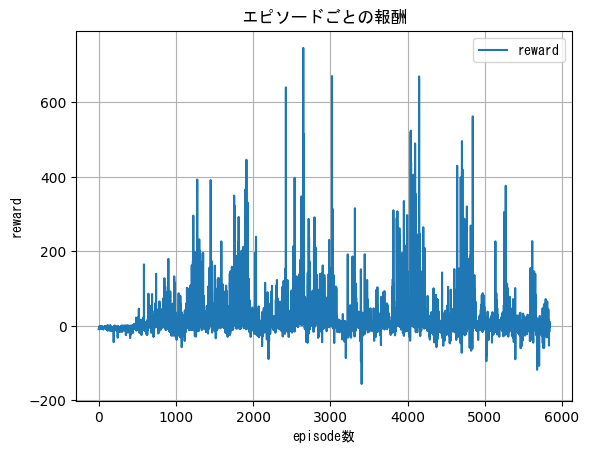

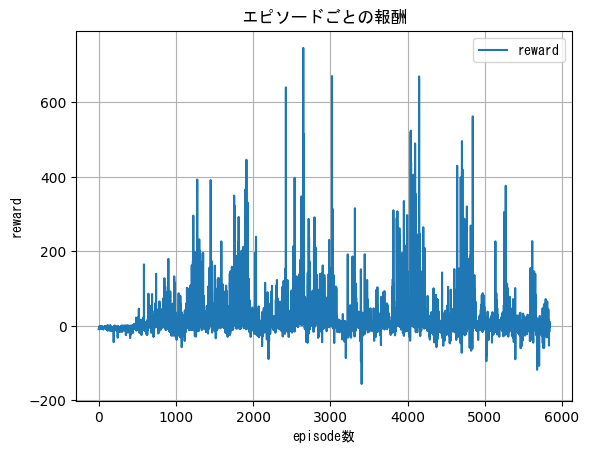

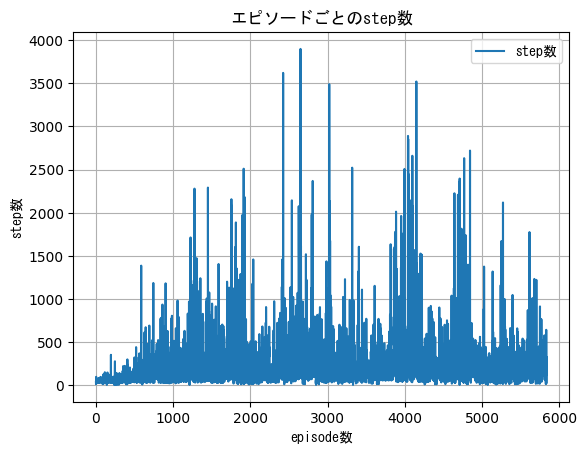

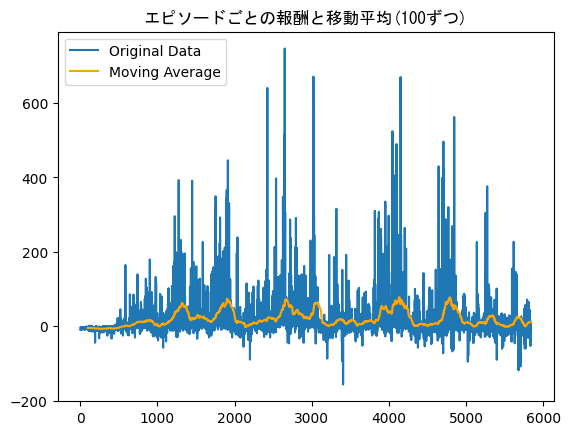

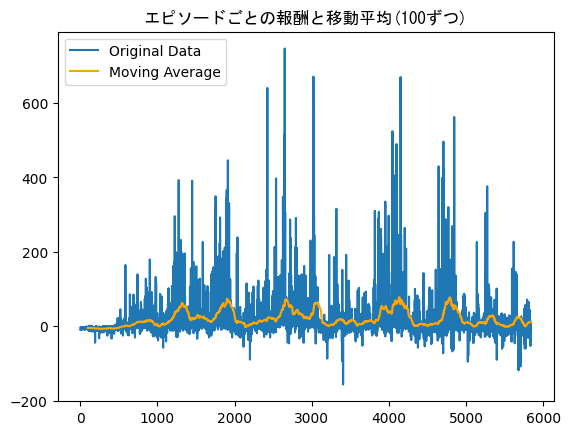

In [8]:
def generate_numbered_array(length):
    return list(range(1, length))

# 例: 長さ指定の配列を生成
timestep_count = generate_numbered_array((episode_num+1))

if INCREMENTAL_LEARNING_MODE:
    # 保存されたQテーブルを読み込む
    with open('zensinnomi_usiro_x3_atohagannbarudake.pkl', 'rb') as f:
        loaded_data = pickle.load(f)
    # 読み込んだデータから必要な変数やリストを取り出す
    before_episode_num = loaded_data['before_episode_num']
    print("Qtableを読み込みました．今までの学習データを前に追加します")
    
    total_episode_num = episode_num + before_episode_num
    total_episode_num = 5840
    total_timestep_count = generate_numbered_array((total_episode_num+1))# +1?

    # total_episode_num = before_episode_num + episode_num
    timestep_count = total_timestep_count


plt.xlabel("episode数", fontname="MS Gothic")
plt.ylabel("reward", fontname="MS Gothic")
plt.grid()
plt.title("エピソードごとの報酬", fontname="MS Gothic")
plt.plot(timestep_count, epi_reward_graph, linestyle='solid', label="reward")
plt.legend(prop={'family':'MS Gothic'})
plt.show()

plt.xlabel("episode数", fontname="MS Gothic")
plt.ylabel("reward", fontname="MS Gothic")
plt.grid()
plt.title("エピソードごとの報酬", fontname="MS Gothic")

# x軸の範囲を0から1200に設定
# plt.xlim(0, 1200)

# y軸の範囲を-50から100に設定
# plt.ylim(-50, 100)

plt.plot(timestep_count, epi_reward_graph, linestyle='solid', label="reward")
plt.legend(prop={'family':'MS Gothic'})
plt.show()


plt.xlabel("episode数", fontname="MS Gothic")
plt.ylabel("step数", fontname="MS Gothic")
plt.grid()
plt.title("エピソードごとのstep数", fontname="MS Gothic")
# x軸の範囲を0から1200に設定
# plt.xlim(0, 1400)
plt.plot(timestep_count, stepsum, linestyle='solid', label="step数")
plt.legend(prop={'family':'MS Gothic'})
plt.show()


# # Qテーブルを保存する
# # 保存したい変数やリストを辞書にまとめる
# data_to_save = { #辞書でまとめてます
#     'agt.Q': agt.Q,
#     'agt.len_Q': agt.len_Q,
#     'before_epi_reward_graph': epi_reward_graph,
#     'before_epi_stepsum': stepsum,
#     'before_episode_num': episode_num,
#     # 一応
#     'before_timestep_count': timestep_count,
# }

# with open('zensinnomi_usiro_x3_test.pkl', 'wb') as f:
#     pickle.dump(data_to_save, f)
# print("Qtable保存しました")

# 移動平均を計算する関数
def moving_average(data, window_size):
    averages = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i + window_size]
        averages.append(sum(window) / window_size)
    return averages

# 移動平均を計算
window_size = 100
moving_avg = moving_average(epi_reward_graph, window_size)

# 元のデータと移動平均をプロット
plt.plot(epi_reward_graph, label='Original Data')
plt.plot(range(window_size - 1, len(epi_reward_graph)), moving_avg, label='Moving Average', color='orange')
plt.title("エピソードごとの報酬と移動平均(100ずつ)", fontname="MS Gothic")
# plt.grid()
# plt.legend(prop={'family':'MS Gothic'})
# x軸の範囲を0から1200に設定
# plt.xlim(0, 1400)

# y軸の範囲を-50から100に設定
# plt.ylim(-50, 40)
plt.legend()
plt.show()

plt.plot(epi_reward_graph, label='Original Data')
plt.plot(range(window_size - 1, len(epi_reward_graph)), moving_avg, label='Moving Average', color='orange')
plt.title("エピソードごとの報酬と移動平均(100ずつ)", fontname="MS Gothic")
# plt.grid()
# plt.legend(prop={'family':'MS Gothic'})
# x軸の範囲を0から1200に設定

plt.legend()
plt.show()



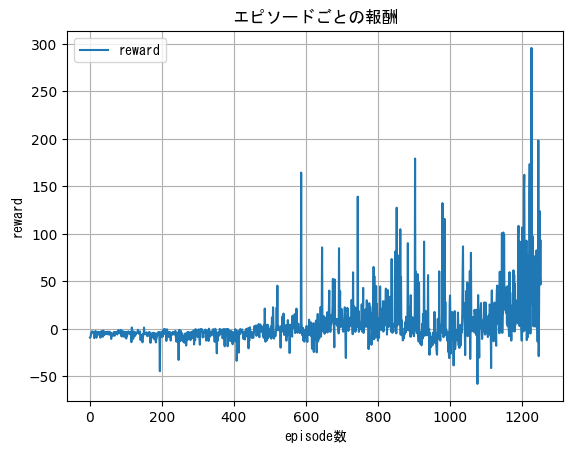

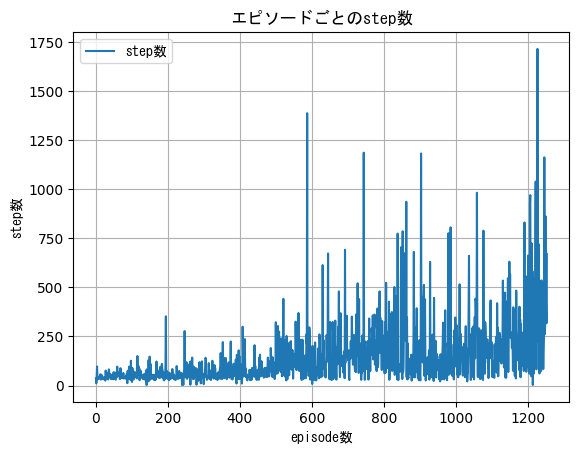

In [7]:
def generate_numbered_array(length):
    return list(range(1, length))

# 例: 長さ指定の配列を生成
timestep_count = generate_numbered_array((episode_num+1))

if INCREMENTAL_LEARNING_MODE:
    # 保存されたQテーブルを読み込む
    with open('zensinnomi_usiro_x3_test.pkl', 'rb') as f:
        loaded_data = pickle.load(f)

    # 読み込んだデータから必要な変数やリストを取り出す
    agt.Q = loaded_data['agt.Q']
    type(agt.Q)
    agt.len_Q = loaded_data['agt.len_Q']
    before_epi_reward_graph = loaded_data['before_epi_reward_graph']
    before_stepsum = loaded_data['before_stepsum']
    before_episode_num = loaded_data['before_episode_num']
    print("agt.len_Q(Qテーブルの数は)",type(agt.len_Q))
    print(agt.len_Q)

    print("Qtableを読み込みました．今までの学習データを前に追加します")
    
    total_episode_num = len(episode_num) + len(before_episode_num)
    total_timestep_count = generate_numbered_array((total_episode_num+1))# +1?
    total_epi_reward_graph = before_epi_reward_graph + epi_reward_graph
    total_stepsum = before_stepsum + stepsum

    # total_episode_num = before_episode_num + episode_num

    epi_reward_graph = total_epi_reward_graph
    stepsum = total_stepsum
    timestep_count = total_timestep_count


plt.xlabel("episode数", fontname="MS Gothic")
plt.ylabel("reward", fontname="MS Gothic")
plt.grid()
plt.title("エピソードごとの報酬", fontname="MS Gothic")
plt.plot(timestep_count, epi_reward_graph, linestyle='solid', label="reward")
plt.legend(prop={'family':'MS Gothic'})
plt.show()

plt.xlabel("episode数", fontname="MS Gothic")
plt.ylabel("step数", fontname="MS Gothic")
plt.grid()
plt.title("エピソードごとのstep数", fontname="MS Gothic")
plt.plot(timestep_count, stepsum, linestyle='solid', label="step数")
plt.legend(prop={'family':'MS Gothic'})
plt.show()


# # Qテーブルを保存する
# # 保存したい変数やリストを辞書にまとめる
# data_to_save = { #辞書でまとめてます
#     'agt.Q': agt.Q,
#     'agt.len_Q': agt.len_Q,
#     'before_epi_reward_graph': epi_reward_graph,
#     'before_epi_stepsum': stepsum,
#     'before_episode_num': episode_num,
#     # 一応
#     'before_timestep_count': timestep_count,
# }

# with open('zensinnomi_usiro_x3_test.pkl', 'wb') as f:
#     pickle.dump(data_to_save, f)
# print("Qtable保存しました")


In [ ]:
print()
print("Qtableは：",str(obs),agt.Q[str(obs)])


Qtableは： 3232 [-0.0018317902756860383, -0.004220287971822212, -0.002526959236582997, -2.3073350184116115e-07]


In [ ]:
print(env.data.xquat[1])

[ 9.99999060e-01  9.92104958e-24 -1.37118702e-03  4.89481227e-20]


ValueError: x and y must have same first dimension, but have shapes (99,) and (100,)

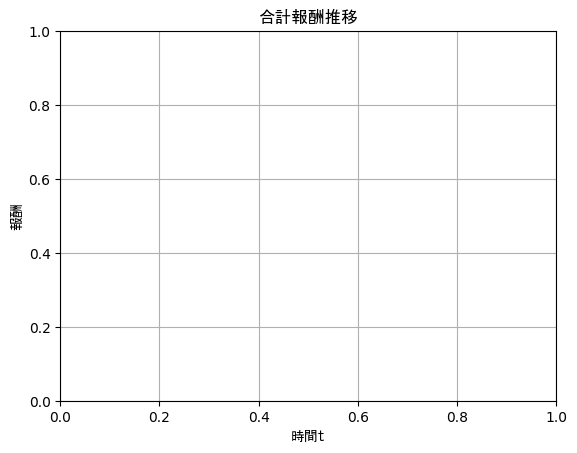

In [ ]:
# 例: 長さ指定の配列を生成
def generate_numbered_array(length):
    return list(range(1, length+0))
timestep_count = generate_numbered_array((episode_num+1))
plt.xlabel("時間t", fontname="MS Gothic")
plt.ylabel("報酬", fontname="MS Gothic")
plt.grid()
plt.title("合計報酬推移", fontname="MS Gothic")
plt.plot(timestep_count, epi_reward_graph, linestyle='solid', label="reward")
plt.legend(prop={'family':'MS Gothic'})
plt.show()

In [ ]:
print(env.model.geom_pos)

[[ 0.     0.     0.   ]
 [ 0.     0.     0.001]
 [ 0.04   0.03   0.001]
 [ 0.04  -0.03   0.001]
 [-0.04   0.03   0.001]
 [-0.04  -0.03   0.001]
 [-0.027  0.     0.001]
 [ 0.027  0.     0.001]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]]


In [ ]:
import numpy as np
ob1 = 0.7
obs=np.digitize(ob1, 0.0, 0.18, 10)*1000

TypeError: digitize() takes from 2 to 3 positional arguments but 4 were given

# agt_netQ

In [ ]:
# """
# agt_netQ.py
# ニューラルネット（Qネットワーク）を使ったQ学習アルゴリズム
# """
# import numpy as np
# import os
# import torch
# from torch import nn

# import torch.optim as optim
# from torch.utils.data import DataLoader
# from torchvision import datasets, transforms
# # from tensorflow.keras.models import Sequential
# # from tensorflow.keras.layers import Dense, Flatten




# import mujoco

# # 自作モジュール
# # import core


AttributeError: partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)

In [ ]:
# # ネットワークの定義
# class SimpleNet(nn.Module):
#     def __init__(self):
#         super(SimpleNet, self).__init__()
#         self.fc1 = nn.Linear(4, 32)  # 入力層から中間層への結合
#         self.fc2 = nn.Linear(32, 2)  # 中間層から出力層への結合

#     def forward(self, x):
#         x = torch.relu(self.fc1(x))  # 中間層でReLUを使用
#         x = self.fc2(x)  # 出力層では活性化関数を使わない（恒等関数）
#         return x

# # ネットワークのインスタンス化
# net = SimpleNet()

# # オプティマイザの定義
# optimizer = optim.Adam(net.parameters(), lr=0.01)

# # ネットワークの構造を表示
# print(net)



SimpleNet(
  (fc1): Linear(in_features=4, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
  (relu): ReLU()
)


In [ ]:
# class NetQAgt(coreAgt):
#     """ Qネットワークを使ったQ学習エージェントクラス """
#     def __init__(               # 引数とデフォルト値の設定 (A)
#             self,
#             n_act=3,            # int: 行動の種類数（ネットワークの出力数）
#             input_size=(4,),    # tuple of int: 入力サイズ
#             n_dense=32,         # int: 中間層のニューロン数
#             epsilon=0.1,        # float: 乱雑度
#             gamma=0.9,          # float: 割引率
#             filepath=None,      # str: 保存ファイル名
#             ):
#         """ 初期処理 """
#         # 引数の設定は適時編集
#         self.epsilon = epsilon
#         # ------------------------- 編集ここから

#         # アトリビュートにパラメータを保存 (B)
#         self.n_act = n_act
#         self.input_size = input_size
#         self.n_dense = n_dense
#         self.gamma = gamma
#         self.filepath = filepath

#         # アトリビュートにモデルを保存 (C)
#         self.model = self._build_Qnet()
#         # ------------------------- ここまで

#     def _build_Qnet(self):
#         """ 指定したパラメータでQネットワークを構築 """
#         # Qネットワークの構築 (A)
#         self.net = SimpleNet()
#         # オプティマイザの定義
#         self.optimizer = optim.Adam(net.parameters(), lr=0.01)
#         # 損失関数の定義
#         self.criterion = nn.CrossEntropyLoss()

#         return net

#     def select_action(self, obs):
#         """  観測に対して行動を出力 """
#     # ------------------------- 編集ここから
#     # 確率的に処理を分岐 (A)
#         if np.random.rand() < self.epsilon:
#             # ランダム行動 (B)
#             act = np.random.randint(0, self.n_act)
#         else:
#             # obsに対するQ値のリストを取得 (C)
#             Q = self.get_Q(obs)

#             # Qを最大にする行動
#             act = np.argmax(Q)
#         # ------------------------- ここまで
#         return act

#     def get_Q(self, obs):
#         """ 観測に対するQ値を出力 """
#         # ------------------------- 編集ここから
#         # 観測obsを入力し出力を得る (A)
#         Q = self.model.predict(
#             obs.reshape((1,) + self.input_size))[0, :]
#         # ------------------------- ここまで
#         return Q

#     def learn(self, obs, act, rwd, done, next_obs):
#         """ 学習 """
#         if rwd is None:
#             return
#         # ------------------------- 編集ここから

#         # obs に対するQネットワークの出力yを得る (A)
#         y = self.get_Q(obs)

#         # target にyの内容をコピーする (B)
#         target = y.copy()

#         if done is False:
#             # 最終状態でなかったら next_obsに対する next_yを得る(C)
#             next_y = self.get_Q(next_obs)

#             # Q[obs][act]のtarget_actを作成 (D)
#             target_act = rwd + self.gamma * max(next_y)
#         else:
#             # 最終状態の場合は報酬だけでtarget_actを作成 (E)
#             target_act = rwd

#         # targetのactの要素だけtarget_actにする (F)
#         target[act] = target_act

#         # obsと target のペアを与えて学習 (G)

#         # 学習のループ
#         for epoch in range(1):  # 1エポックの例
#             optimizer.zero_grad()  # 勾配をリセット
#             output = net(obs)  # フォワードパス
#             loss = self.criterion(output, target)  # 損失の計算
#             loss.backward()  # バックワードパス（勾配の計算）
#             optimizer.step()  # パラメータの更新
#         # ------------------------- ここまで
#         return 

#     # def save_weights(self, filepath=None):
#     #     """ モデルの重みデータの保存 """
#     #     # ------------------------- 編集ここから
#     #     if filepath is None:
#     #         filepath = self.filepath
#     #     self.model.save(filepath + '.h5', overwrite=True)
#     #     # ------------------------- ここまで

#     # def load_weights(self, filepath=None):
#     #     """ モデルの重みデータの読み込み """
#     #     # ------------------------- 編集ここから
#     #     if filepath is None:
#     #         filepath = self.filepath
#     #     self.model = tf.keras.models.load_model(filepath + '.h5')
#     #     # ------------------------- ここまで

    


In [ ]:

# if __name__ == '__main__':
#     # エージェントのインスタンス生成 (A)
#     agt = NetQAgt(n_act=3, input_size=(5,))

#     # 行動選択 (B)
#     obs = np.array([[1, 1, 1, 1, 1]])
#     act = agt.select_action(obs)
#     print('act', act)

#     # 学習 (C)
#     rwd = 1
#     done = False
#     next_obs = np.array([[1, 1, 1, 1, 2]])
#     agt.learn(obs, act, rwd, done, next_obs)

#     # モデル構造の表示 (D)
#     print('モデルの構造')
#     agt.model.summary()

#     # 重みパラメータの保存 (E)
#     agt.save_weights('agt_data/test')

#     # 重みパラメータの読み込み (F)
#     agt.load_weights('agt_data/test')

#     # モデルへの観測の入力 (G)
#     y = agt.model.predict(obs)
#     print('モデルの出力 y', y.reshape(-1))


In [ ]:
# from tqdm import trange
# print('mujocoで学習開始!!!')
# reward_for_graph = []

# env=MyEnv()

# agt= NetQAgt(2,4,32,0.1,0.9,)

# obs = env.reset()
# for t in range(100):
#     act = agt.select_action(obs) #たまにQ値最適の行動を選ぶ　グリーディほう
#     rwd, done, next_obs = env.step(act) 
#     reward_for_graph.append(rwd)

#     agt.learn(obs, act, rwd, done, next_obs)

#     obs = next_obs




mujocoで学習開始!!!


AttributeError: 'SimpleNet' object has no attribute 'predict'

In [ ]:
!pip uninstall tensorflow

^C


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

AttributeError: module 'tensorflow' has no attribute 'keras'

# 離散化コード

In [ ]:
def discretize(value):
    # 0から0.18の範囲を10段階に分割
    if value == -1:
        value = 0.18
    discrete_value = int(value / 0.018)
    return min(discrete_value, 9)  # 最大値が10段階目になるように調整 9以上にならないようにしている

def discretize_values(ob1, ob2, ob3, ob4):
    # 各値を離散化
    discrete_ob1 = discretize(ob1)
    discrete_ob2 = discretize(ob2)
    discrete_ob3 = discretize(ob3)
    discrete_ob4 = discretize(ob4)
    sum = discrete_ob1*1000 + discrete_ob2*100 + discrete_ob3*10 + discrete_ob4*1

    return discrete_ob1, discrete_ob2, discrete_ob3, discrete_ob4, sum

# 例: ob1=0.05, ob2=0.10, ob3=0.15, ob4=0.18 の場合
ob1 = 0.14
ob2 = 0.10
ob3 = 0.15
ob4 = 0.18

discrete_ob1, discrete_ob2, discrete_ob3, discrete_ob4, sum = discretize_values(ob1, ob2, ob3, ob4)

print(f"Discretized Values: {discrete_ob1}, {discrete_ob2}, {discrete_ob3}, {discrete_ob4}, {sum}")